<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/EDA%20ML%20data%20science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Загрузка, очистка и визуализация данных

Пример №1 - финансы: оценка кредитоспособности

Столбец **default** - показывает статус по дефолту заёмщика

Независимые переменные:

— возраст заемщика (age);

— образование заемщика (ed);

— стаж заемщика на последнем месте работы (employ);

— срок проживания заемщика по последнему адресу (address);

— ежемесячный личный доход заемщика (income);

— процент долговых обязательств заемщика от дохода (debtinc);

— долг заемщика по кредитной карте банка (creddebt);

— прочие долговые обязательства заемщика (othdebt).

In [ ]:
#table_data = pd.read_csv('https://raw.githubusercontent.com/TAUforPython/BioMedAI/main/test_datasets/bankloans.csv')
#table_data = table_data.dropna(subset=['default'])
#print(table_data)

#table_data['default'] = table_data['default'].astype('int')
#print(table_data)

Пример №2 - медицина - дата сет кардиология:
выгружено и предобработано MIMIC-IV-ECG/ Diagnostic Electrocardiogram Matched Subset v1.0

Столбец **Healthy_Status**: 0 = пациент, 1 - условно здоровый.

https://physionet.org/content/mimic-iv-ecg/1.0/

Декодированы метки времени, добавлен признак Healthy_Status

Полезная ссылка на понимание ЭКГ: https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/

In [ ]:
!wget https://drive.google.com/file/d/1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB

--2024-11-17 07:32:26--  https://drive.google.com/file/d/1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB/ [following]
--2024-11-17 07:32:26--  https://drive.google.com/file/d/1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB/
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB/edit [following]
--2024-11-17 07:32:26--  https://drive.google.com/file/d/1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB/edit
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1-Z2Yvcl7J8ZhdSp-MEqTHfzdrhbSdcdB’

1-Z2Yvcl7J

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import functools
pd.read_csv = functools.partial(pd.read_csv, low_memory=False)


ecg_path = '/content/drive/MyDrive/edf_process/ECG_array_arrow_data.csv'
#table_data = pd.read_csv(ecg_path, nrows=10000, parse_dates=True)
table_data = pd.read_csv(ecg_path, nrows=100,low_memory=False)

Mounted at /content/drive


ParserError: Error tokenizing data. C error: Expected 1 fields in line 13, saw 3


In [6]:
link_path = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/main/test_datasets/test_data_ECG.csv'
df = pd.read_csv(link_path, parse_dates=True)
total_rows = len(df.index)
headers = df.columns

9000
Random values to read: [12, 14, 19, 22, 28, 33, 34, 62, 82, 84, 87, 143, 147, 160, 168, 169, 170, 206, 208, 223, 230, 244, 264, 281, 292, 299, 307, 317, 330, 336, 350, 351, 371, 392, 394, 396, 436, 437, 440, 449, 457, 465, 466, 489, 497, 503, 506, 514, 516, 525, 527, 533, 540, 554, 568, 582, 590, 600, 605, 612, 613, 627, 640, 641, 642, 652, 654, 660, 678, 689, 702, 723, 730, 737, 745, 750, 756, 759, 762, 764, 765, 773, 778, 787, 788, 789, 810, 830, 841, 844, 852, 859, 861, 871, 881, 890, 892, 903, 904, 912, 938, 946, 965, 966, 969, 972, 981, 1009, 1033, 1044, 1079, 1085, 1093, 1115, 1116, 1121, 1126, 1137, 1151, 1154, 1157, 1159, 1162, 1171, 1182, 1211, 1213, 1215, 1216, 1217, 1231, 1239, 1246, 1261, 1282, 1288, 1296, 1310, 1312, 1325, 1332, 1336, 1347, 1363, 1380, 1381, 1382, 1391, 1396, 1401, 1409, 1413, 1429, 1446, 1449, 1457, 1461, 1465, 1479, 1486, 1504, 1508, 1533, 1534, 1565, 1566, 1568, 1575, 1589, 1593, 1596, 1597, 1604, 1626, 1627, 1635, 1636, 1638, 1644, 1650, 1652, 165

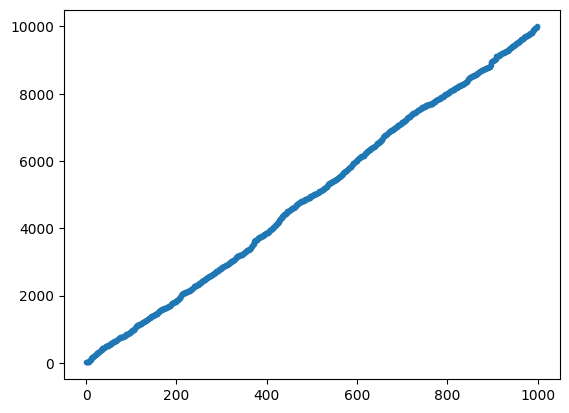

In [7]:
#формирование слуайного набора индексов для выгрузки из большого файла
import random
total_number=range(total_rows)
rows2read = 1000 # number rows to read
random_value2skip = sorted(random.sample(range(total_rows),total_rows-rows2read))

print(len(random_value2skip))

print("Random values to read:", sorted(set(total_number).difference(random_value2skip)))
random_value2read = sorted(np.array(list(set(total_number).difference(random_value2skip))))
plt.plot(random_value2read,'.')

In [8]:
# загрузка из большого массива случайного набора сэмплов с сохранением header
import random

dtypes = {'eeg_date': 'object'}
link_path = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/main/test_datasets/test_data_ECG.csv'

table_data = pd.read_csv(link_path, skiprows=random_value2skip)
table_data.columns = headers
#table_data = pd.read_csv(link_path, nrows=1000)
print(table_data)

     subject_id  Count_subj  study_id  cart_id  Healthy_Status eeg_time   \
0      16495075           4  40000199  6211065               0   8:54 AM   
1      11662086           3  40000259  6376932               0   8:31 AM   
2      16441592           8  40000306  6306582               1  12:14 PM   
3      17446715           4  40000438  6752764               0   5:45 AM   
4      14851532          92  40000489  6903271               0   8:39 PM   
..          ...         ...       ...      ...             ...       ...   
995    12138413           8  40124727  6049786               1   2:16 PM   
996    10432024           4  40124886  6049786               0   8:55 AM   
997    14096207           7  40124963  6672155               0  11:16 PM   
998    13871862           2  40125273  6848296               1   5:38 PM   
999    14747544          12  40125285  6848296               0  11:58 PM   

      eeg_date                                            report_0  \
0    19.09.2012  

In [9]:
pd.to_datetime(table_data['eeg_date '], dayfirst=True)

0     2012-09-19
1     2011-08-26
2     2015-10-14
3     2015-10-01
4     2016-01-24
         ...    
995   2015-09-21
996   2011-09-24
997   2013-11-17
998   2011-01-03
999   2011-01-03
Name: eeg_date , Length: 1000, dtype: datetime64[ns]

In [28]:
uniq_patient_table_data = table_data['subject_id'].unique()
print('число уникальных записей по параметру subjet_id = ', len(uniq_patient_table_data))

число уникальных записей по параметру subjet_id =  988


In [29]:
x = table_data['subject_id'].value_counts().to_frame()
x['count'].values[0]

2

In [9]:
index_max_length_array_arrow_data = table_data['subject_id'].value_counts().to_frame().values[0][0]
index_max_length_array_arrow_data

2

In [10]:
np.percentile(table_data['rr_interval'], 75)

952.0

In [30]:
table_data["subject_id"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: subject_id, Length: 1000, dtype: bool

In [31]:
uniq_patient = table_data[table_data["subject_id"] == 11296936]
uniq_patient.head()

subject_id  Count_subj  study_id  cart_id  Healthy_Status eeg_time   \
95    11296936         260  40011679  6584627               0  10:50 AM   

     eeg_date       report_0                                 report_1  \
95  08.10.2012  Sinus rhythm  Anterior T wave changes are nonspecific   

   report_2  ...                    filtering rr_interval p_onset p_end  \
95      NaN  ...  60 Hz notch Baseline filter         638      40   152   

   qrs_onset qrs_end t_end p_axis  qrs_axis  t_axis  
95       212     296   532     61        45      33  

[1 rows x 36 columns]

In [13]:
uniq_patient = uniq_patient.reset_index()

In [14]:
uniq_patient['eeg_date '] = pd.to_datetime(uniq_patient['eeg_date '], dayfirst=True)

#uniq_patient['eeg_date']

In [21]:
uniq_patient = uniq_patient.sort_values(by=['eeg_date '],axis=0, ascending=True)
uniq_patient

Empty DataFrame
Columns: [index, subject_id, Count_subj, study_id, cart_id, Healthy_Status, eeg_time , eeg_date , report_0, report_1, report_2, report_3, report_4, report_5, report_6, report_7, report_8, report_9, report_10, report_11, report_12, report_13, report_14, report_15, report_16, report_17, bandwidth, filtering, rr_interval, p_onset, p_end, qrs_onset, qrs_end, t_end, p_axis, qrs_axis, t_axis]
Index: []

[0 rows x 37 columns]

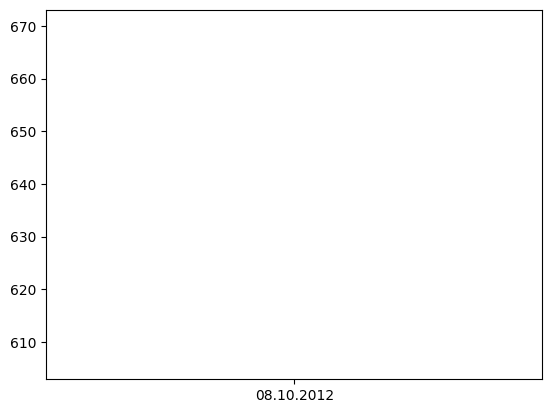

In [32]:
plt.plot(uniq_patient['eeg_date '],uniq_patient['rr_interval'])

In [33]:
#table_data.groupby(['item_#','status']).first().unstack().dropna().stack()
table_data.groupby(['subject_id']).first().unstack().dropna()

subject_id
Count_subj  10048779       5
            10057005       2
            10068304      21
            10081045      12
            10081639       6
                          ..
t_axis      19905034      75
            19917746      18
            19932797      21
            19961888      65
            19999297      50
Length: 20143, dtype: object

In [10]:
# make new dataset from old columns
pre_data = table_data[['subject_id', 'study_id', 'eeg_date ', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']].copy()

table_data = table_data[['Healthy_Status', 'rr_interval','p_end','qrs_onset','qrs_end','p_axis','qrs_axis','t_axis']].copy()

# Helicopter view

In [11]:
table_data.head()

Healthy_Status  rr_interval  p_end  qrs_onset  qrs_end  p_axis  qrs_axis  \
0               0         1034    168        190      288      14       -15   
1               0          666    168        246      328      69        26   
2               1          731    146        216      300       0         0   
3               0          722    156        176      272      47        52   
4               0          560    150        166      252      29        -6   

   t_axis  
0      -9  
1      95  
2      17  
3      46  
4       3

In [12]:
table_data.describe()

Healthy_Status   rr_interval         p_end     qrs_onset       qrs_end  \
count     1000.000000   1000.000000   1000.000000   1000.000000   1000.000000   
mean         0.186000    844.277000   9043.442000    268.206000    366.841000   
std          0.389301    943.821814  13660.178552    947.118267    944.408812   
min          0.000000    353.000000     48.000000     76.000000    159.000000   
25%          0.000000    674.000000    146.000000    188.000000    278.000000   
50%          0.000000    810.000000    158.000000    200.000000    300.000000   
75%          0.000000    937.000000  29999.000000    226.000000    338.000000   
max          1.000000  29999.000000  29999.000000  29999.000000  29999.000000   

            p_axis      qrs_axis        t_axis  
count   1000.00000   1000.000000   1000.000000  
mean    5404.54600    165.825000    193.367000  
std    11526.18207   2116.808652   2114.988676  
min     -150.00000   -177.000000   -180.000000  
25%       37.00000    -14.250000     17.000000  
50%       57.00000     13.000000     43.000000  
75%       73.00000     47.000000     73.000000  
max    32767.00000  29999.000000  29999.000000

# Визуализация во временной области

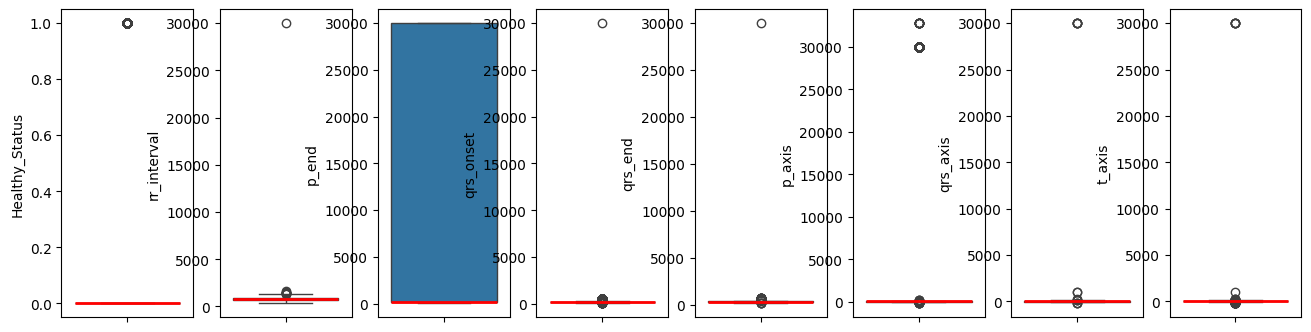

In [13]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data, medianprops={"color": "r", "linewidth": 2})

In [14]:
data = table_data

#Оставляем только нужные столбцы (ID Пациента, Порядковый номер исследования - для удобства сортировки последовательности измерений рез-ов болезней, Статус,
#Дату - чтобы понимать случаи измерений с большим временным интервалом, Все показатели измерений)

columns_to_check = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
clear_data = pre_data[(pre_data[columns_to_check] < 2000).all(axis=1)]
clear_data = clear_data[(clear_data['p_onset'] < clear_data['p_end']) & (clear_data['qrs_onset'] < clear_data['qrs_end'])]

clear_data

subject_id  study_id   eeg_date   rr_interval  p_onset  p_end  qrs_onset  \
0      16495075  40000199  19.09.2012         1034       40    168        190   
1      11662086  40000259  26.08.2011          666       40    168        246   
2      16441592  40000306  14.10.2015          731       40    146        216   
3      17446715  40000438  01.10.2015          722       40    156        176   
4      14851532  40000489  24.01.2016          560       40    150        166   
..          ...       ...         ...          ...      ...    ...        ...   
995    12138413  40124727  21.09.2015          909       40    164        194   
996    10432024  40124886  24.09.2011          789       40    158        170   
997    14096207  40124963  17.11.2013          689       40    150        166   
998    13871862  40125273  03.01.2011          789       40    158        192   
999    14747544  40125285  03.01.2011          923       40    158        200   

     qrs_end  t_end  p_axis  qrs_axis  t_axis  Healthy_Status  
0        288    660      14       -15      -9               0  
1        328    592      69        26      95               0  
2        300    588       0         0      17               1  
3        272    564      47        52      46               0  
4        252    510      29        -6       3               0  
..       ...    ...     ...       ...     ...             ...  
995      276    598      56        19      52               1  
996      270    532      47       -35      43               0  
997      258    524      64       -30      34               0  
998      288    592      43        14      15               1  
999      292    630      30        20      13               0  

[701 rows x 13 columns]

In [15]:
# удаляем аномалии из данных (убрать все значения более 5000)
#table_data = table_data.drop(table_data[table_data['qrs_axis'] > 5000].index)
for i, v in enumerate(table_data):
  table_data = table_data.drop(table_data[table_data.iloc[:,i] > 10000].index)

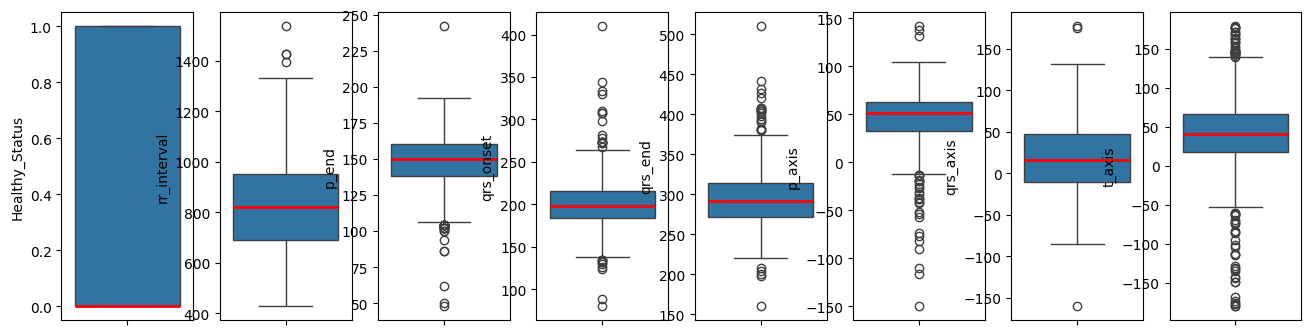

In [16]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data,
                medianprops={"color": "r", "linewidth": 2})
    plt.tight_layout

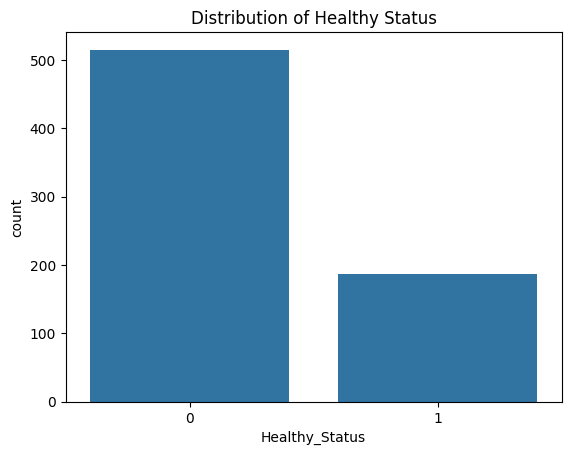

In [17]:
sns.countplot(data=table_data, x="Healthy_Status")
plt.title("Distribution of Healthy Status")
plt.show()

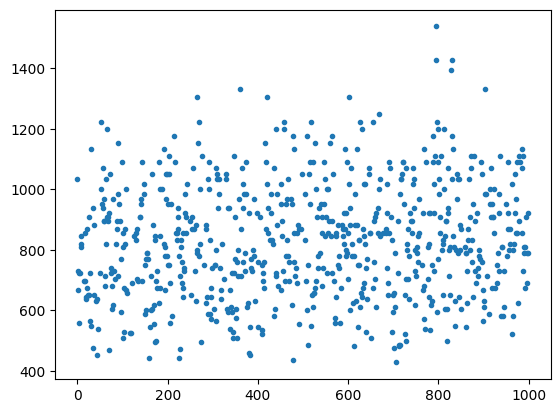

In [18]:
#example view
plt.plot(table_data['rr_interval'],'.')

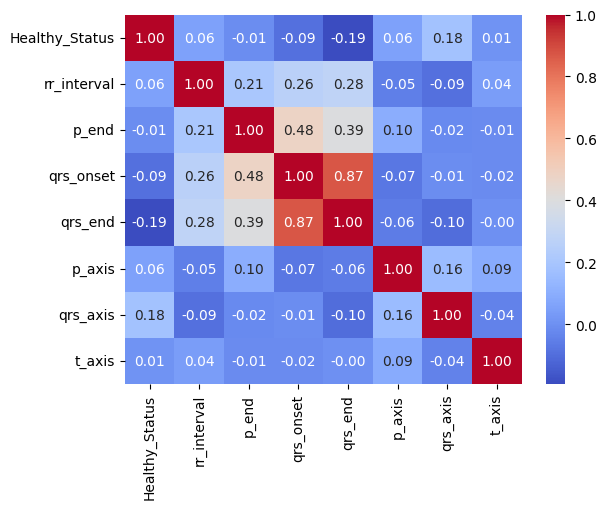

In [19]:
sns.heatmap(table_data.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [44]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='hist')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('%.1f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Таблица анализа данных, коэффициент корреляции')
    plt.show()

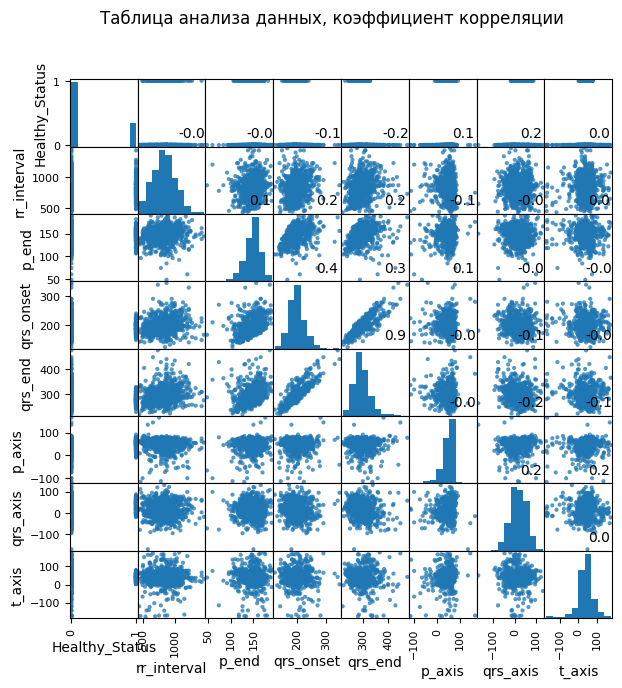

In [45]:
plotScatterMatrix(table_data, 7, 10)

<Axes: xlabel='rr_interval', ylabel='p_axis'>

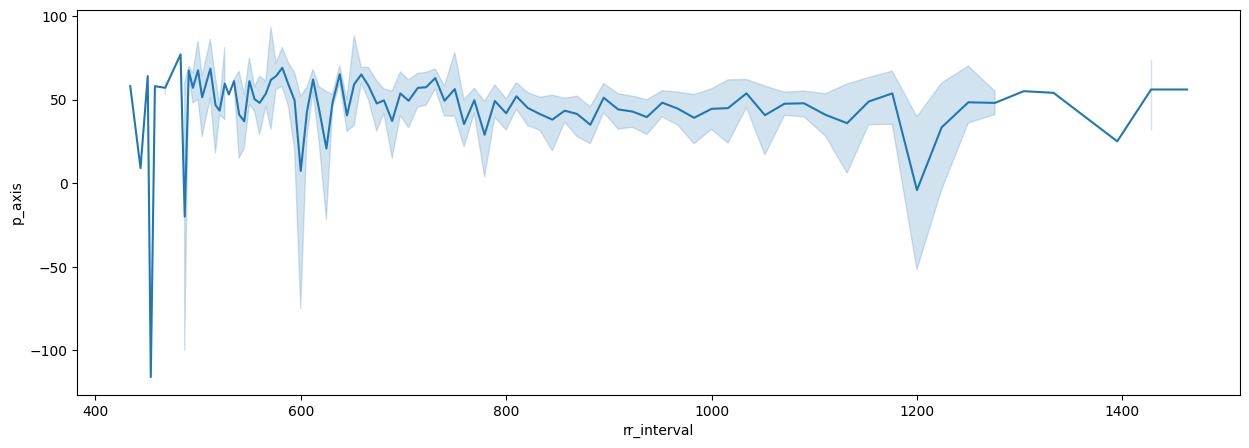

In [46]:
fig,ax = plt.subplots(figsize=(15,5))
#sns.lineplot(x='age',y='debtinc',data=table_data,ax=ax)
sns.lineplot(x='rr_interval',y='p_axis',data=table_data,ax=ax)

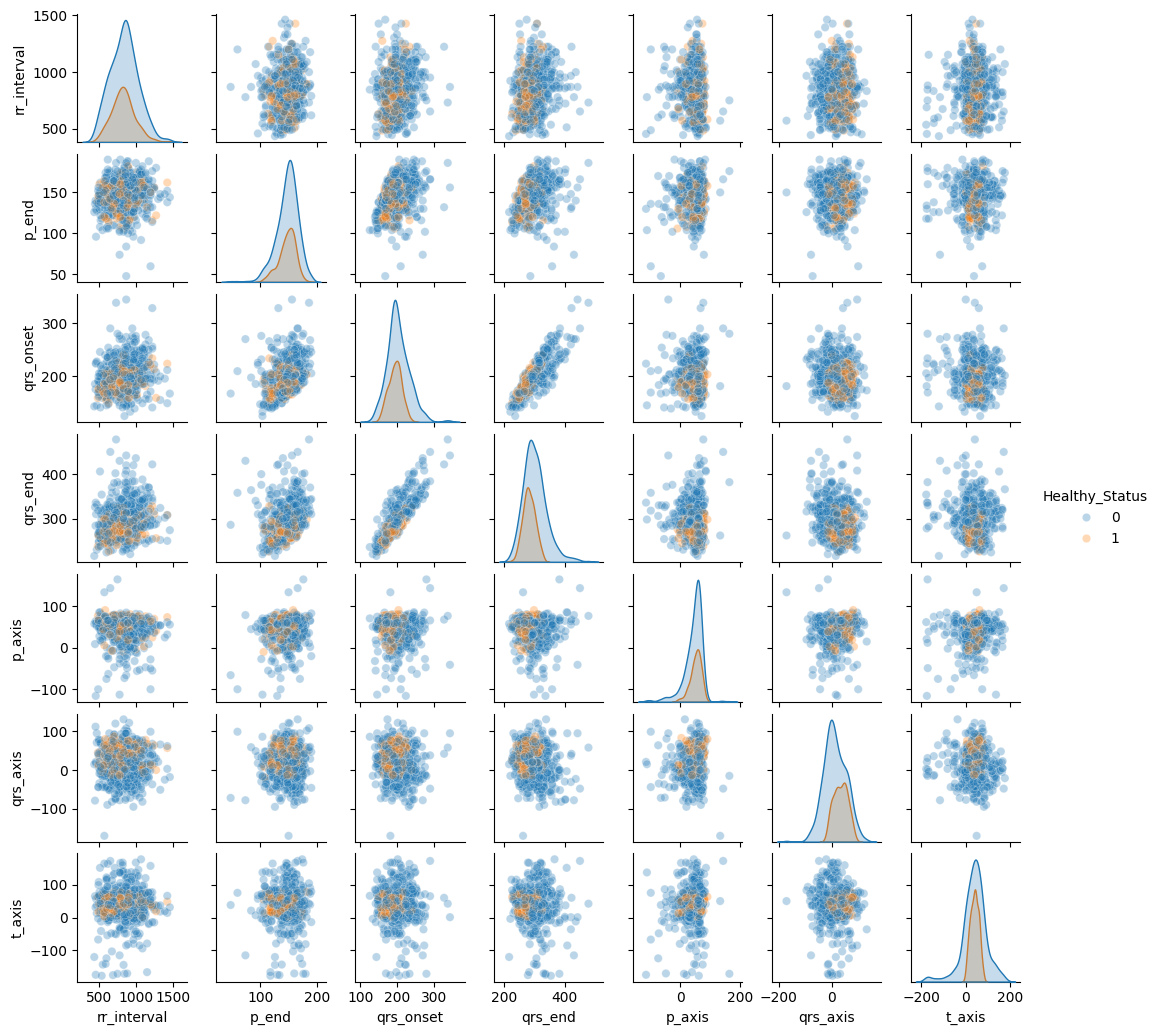

In [47]:
#labels = pd.DataFrame(table_data['Healthy_Status'])
sns.pairplot(table_data, hue = "Healthy_Status",
             height=1.5,
             plot_kws=dict(alpha=0.3))

<Axes: xlabel='rr_interval', ylabel='qrs_end'>

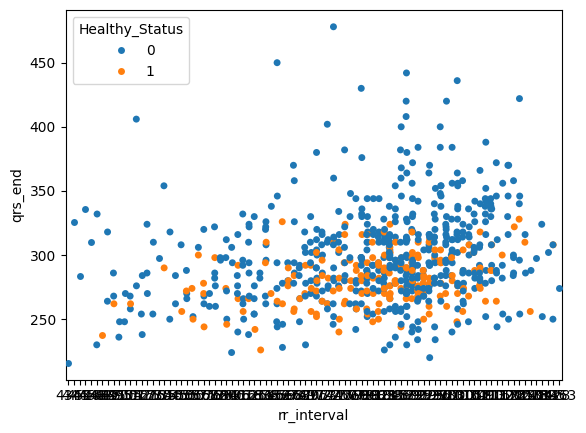

In [48]:
sns.stripplot(x=table_data['rr_interval'],y=table_data['qrs_end'],
              hue=table_data['Healthy_Status'],jitter=True)

<Axes: xlabel='rr_interval'>

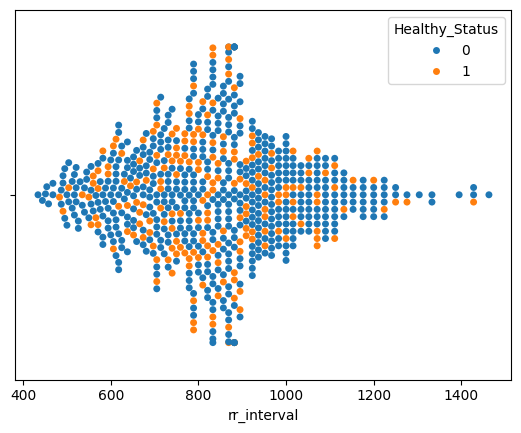

In [49]:
sns.swarmplot(data=table_data, x="rr_interval", hue="Healthy_Status")

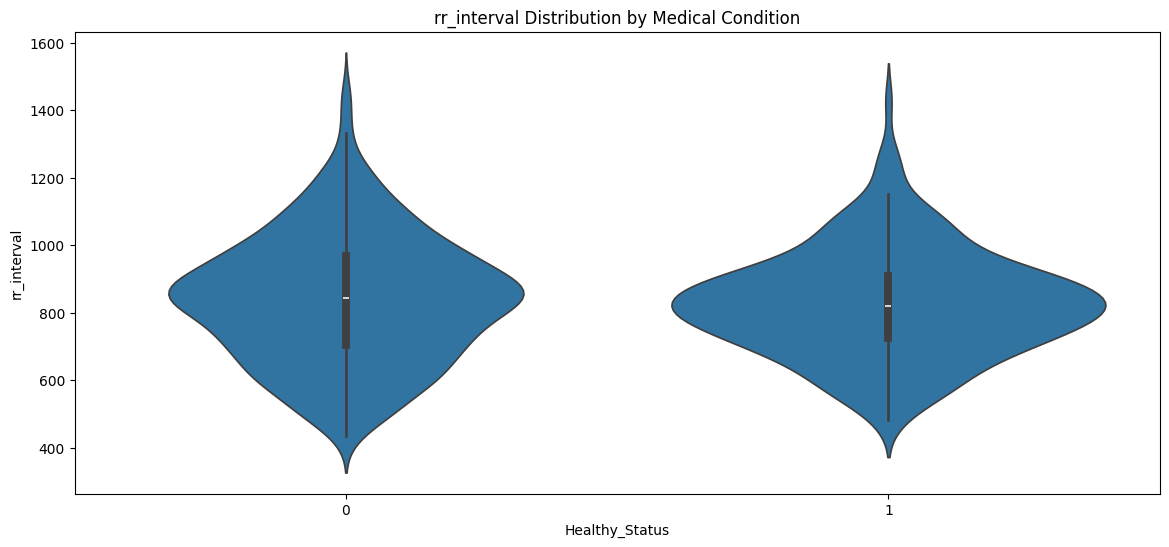

In [50]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=table_data, y='rr_interval', x='Healthy_Status')
plt.title('rr_interval Distribution by Medical Condition')
plt.show()

# Kolmogorov-Arnold network

In [ ]:
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
Y = table_data['Healthy_Status'] # таргет
X = table_data.iloc[:, 1:7] # переменные

# Разбиваем данные на обучающую и тестовую выборки
RANDOM_SEED = 45

train_input, test_input, train_label, test_label = train_test_split(X, Y, train_size=0.85, random_state=RANDOM_SEED, stratify=Y)
print('Распределение Y_train по классам 0 и 1 соответственно:', np.bincount(train_label))
print('Распределение Y_test по классам 0 и 1 соответственно:', np.bincount(test_label))

Распределение Y_train по классам 0 и 1 соответственно: [455 143]
Распределение Y_test по классам 0 и 1 соответственно: [81 25]


In [ ]:
# create a KAN: 6D inputs, 2D output, and 2D hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).

model = KAN(width=[6,2,1], grid=5, k=3, seed=2024, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [ ]:
dataset = {}
type = torch.get_default_dtype()
dataset['train_input'] = torch.from_numpy(train_input.values).type(dtype).to(device)
dataset['test_input'] = torch.from_numpy(test_input.values).type(dtype).to(device)
dataset['train_label'] = torch.from_numpy(train_label.values[:,None]).type(dtype).to(device)
dataset['test_label'] = torch.from_numpy(test_label.values[:,None]).type(dtype).to(device)

In [ ]:
results = model.fit(dataset, opt="LBFGS", steps=50)

| train_loss: 3.94e-01 | test_loss: 4.19e-01 | reg: 6.94e+00 | : 100%|█| 50/50 [00:10<00:00,  4.92it

saving model version 0.2


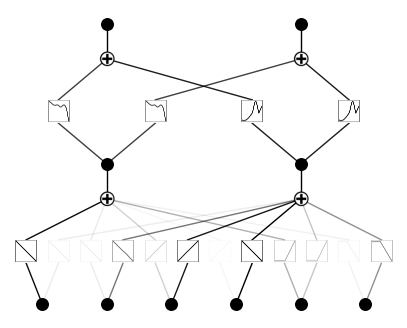

In [ ]:
model.plot()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
# Predictions of train val and test datasets
test_preds = model.forward(dataset['test_input']).detach()
test_labels = test_label

train_preds = model.forward(dataset['train_input']).detach()
train_labels = train_label


# Evaluate metrics
print("Train R2 Score:", r2_score(train_labels, train_preds))
print("Train MAE:", mean_absolute_error(train_labels, train_preds))

print("Test R2 Score:", r2_score(test_labels, test_preds))
print("Test MAE:", mean_absolute_error(test_labels, test_preds))

Train R2 Score: 0.14388160464654798
Train MAE: 0.31779956969317286
Test R2 Score: 0.07056453313502531
Test MAE: 0.32945651648882424


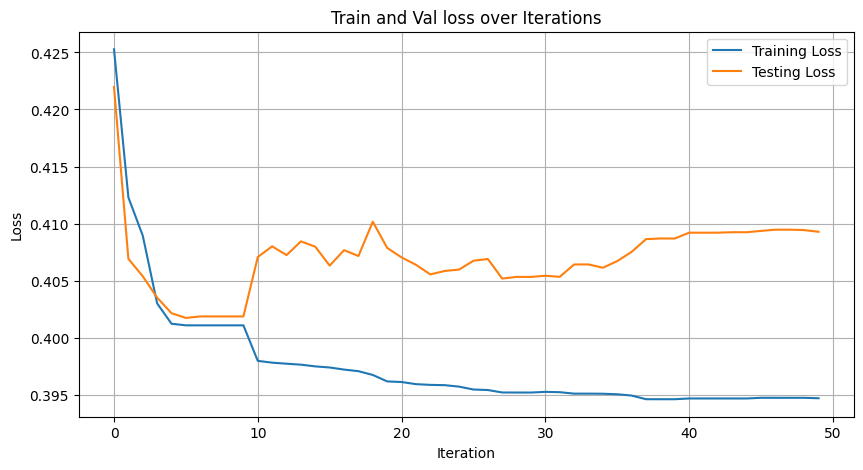

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(results["train_loss"], label='Training Loss')
plt.plot(results["test_loss"], label='Testing Loss')
plt.title('Train and Val loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

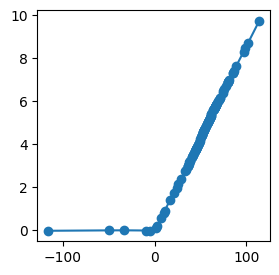

In [ ]:
x, y = model.get_fun(0,4,1)

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=1.0000004768371582, c=1
fixing (0,0,1) with x, r2=0.9999791979789734, c=1
fixing (0,1,0) with x, r2=0.9999964833259583, c=1
fixing (0,1,1) with x, r2=0.9996299743652344, c=1
fixing (0,2,0) with x, r2=0.9999964237213135, c=1
fixing (0,2,1) with x, r2=0.999997615814209, c=1
fixing (0,3,0) with x, r2=0.9999954700469971, c=1
fixing (0,3,1) with x, r2=1.0000003576278687, c=1
fixing (0,4,0) with x, r2=0.8498258590698242, c=1
fixing (0,4,1) with x, r2=0.8441300392150879, c=1
fixing (0,5,0) with x, r2=0.8713005185127258, c=1
fixing (0,5,1) with x, r2=0.8656324744224548, c=1
fixing (1,0,0) with x, r2=0.774432361125946, c=1
fixing (1,1,0) with x, r2=0.7436120510101318, c=1
saving model version 0.3


In [ ]:
import sympy
formula = sympy.sympify(str(model.symbolic_formula()[0][0]))
ex_round(formula, 4)

0.0003*x_1 - 0.0014*x_2 + 0.0029*x_3 - 0.0061*x_4 + 0.0004*x_5 - 0.0003*x_6 + 1.4375

In [ ]:
formula1, formula2 = model.symbolic_formula()[0]
ex_round(formula1, 4)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
ex_round(formula2, 4)

0.0004*x_1 - 0.0015*x_2 + 0.0023*x_3 - 0.0054*x_4 - 0.e-4*x_5 - 0.0005*x_6 + 1.237

In [ ]:
# how accurate is this formula?
def acc(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float32)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float32)
        correct += (logit2 > logit1) == y[i]
    return correct/batch

print('train acc of the formula:', acc(formula1, formula2, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula1, formula2, dataset['test_input'], dataset['test_label']))

TypeError: cannot determine truth value of Relational

# Частотный анализ

In [ ]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 7.0 MB/s eta 0:00:00


In [ ]:
import wfdb

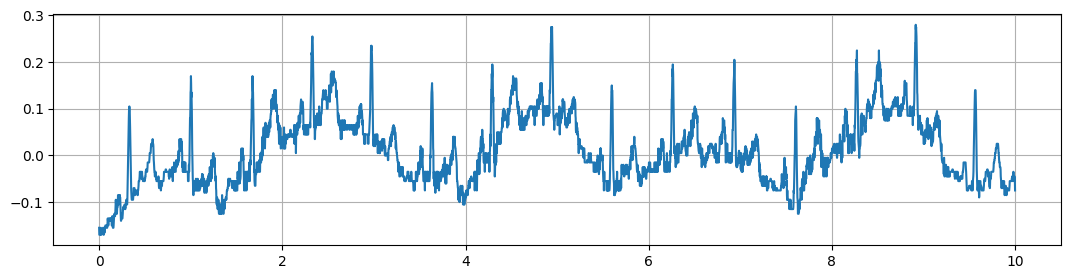

In [ ]:
rec_path = '40689238'
ecg_wfdb_record = wfdb.rdrecord(rec_path, pn_dir='mimic-iv-ecg/1.0/files/p1000/p10000032/s40689238/')
ecg_data = wfdb.rdsamp(rec_path, channel_names='I', pn_dir='mimic-iv-ecg/1.0/files/p1000/p10000032/s40689238/')
time_series = ecg_data[0]
#sig_name': ['I', 'II', 'III', 'aVR', 'aVF', 'aVL', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
t = np.linspace(0, ecg_wfdb_record.sig_len/ecg_wfdb_record.fs, ecg_wfdb_record.sig_len)

plt.figure(figsize=(13, 3))
plt.plot(t,time_series)
plt.grid()
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq

N = ecg_wfdb_record.sig_len
#y = y_filt
yfft = fft(time_series)
xf = fftfreq(N, T/N)[:N//2]
yf = np.abs(yfft[0:N//2])

# устанавливаем максимальную частоту для отображения на графике преобразования Фурье
f_viewmax = 20
if len(np.where(xf > f_viewmax)[0]) == 0:
  index_f_viewmax = len(xf)
else:
  index_f_viewmax = np.where(xf > f_viewmax)[0][0]
print('число точек в диапазоне преобразования Фурье:',len(xf))
print('максимальная частота', xf[-1])
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf[0:index_f_viewmax], yf[0:index_f_viewmax], label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
#plt.xticks(np.arange(1, np.max(xf[0:100]), 2))
plt.grid()
plt.legend()
plt.show()

NameError: name 'T' is not defined

https://www.kaggle.com/code/ellecf/visualizing-multidimensional-clusters

In [ ]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

# AutoML BlueCast

https://www.kaggle.com/code/thomasmeiner/ps3e24-bluecast-eda-automl-tracking

In [2]:
!pip install bluecast --quiet

In [3]:
import numpy as np
import pandas as pd
import re


from bluecast.blueprints.cast import BlueCast
from bluecast.blueprints.cast_cv import BlueCastCV
from bluecast.config.training_config import TrainingConfig, XgboostTuneParamsConfig
from bluecast.preprocessing.custom import CustomPreprocessing
from bluecast.general_utils.general_utils import save_to_production, load_for_production

from sklearn.model_selection import StratifiedKFold, RepeatedKFold

In [20]:
Y = clear_data['Healthy_Status'] # таргет
X = clear_data.iloc[:, 0:12] # переменные

# Разбиваем данные на обучающую и тестовую выборки
RANDOM_SEED = 45

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, random_state=RANDOM_SEED, stratify=Y)
print('Распределение Y_train по классам 0 и 1 соответственно:', np.bincount(Y_train))
print('Распределение Y_test по классам 0 и 1 соответственно:', np.bincount(Y_test))

Распределение Y_train по классам 0 и 1 соответственно: [437 158]
Распределение Y_test по классам 0 и 1 соответственно: [78 28]


In [21]:
#  Набор данных о неплательщиках по кредиту
df = table_data

# Проверка формы набора данных
print('исходный набор данных: ',df.shape)

# Инициализация начального числа для генераторов случайных чисел
seed = 10

# Создание обучающего набора с помощью выборки pandas — видимый набор данных
train_dataset = df.sample(frac=.8, random_state=seed)
#knowledge.reset_index(inplace=True, drop=True)
print('выделяем из исходного набора данныз базу для обучения: ', train_dataset.shape)

# Использование образцов, недоступных в обучающем наборе, в качестве будущего или невидимого набора данных
test_dataset = df.drop(train_dataset.index)
#payload.reset_index(inplace=True, drop=True)
print('набор данных для проверки: ',test_dataset.shape)


исходный набор данных:  (701, 8)
выделяем из исходного набора данныз базу для обучения:  (561, 8)
набор данных для проверки:  (140, 8)


In [22]:
target = 'Healthy_Status'

In [23]:
from bluecast.preprocessing.feature_types import FeatureTypeDetector

feat_type_detector = FeatureTypeDetector()
train_data = feat_type_detector.fit_transform_feature_types(train_dataset)

len(feat_type_detector.num_columns)

8

In [24]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 291 to 782
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Healthy_Status  561 non-null    int64
 1   rr_interval     561 non-null    int64
 2   p_end           561 non-null    int64
 3   qrs_onset       561 non-null    int64
 4   qrs_end         561 non-null    int64
 5   p_axis          561 non-null    int64
 6   qrs_axis        561 non-null    int64
 7   t_axis          561 non-null    int64
dtypes: int64(8)
memory usage: 39.4 KB


In [27]:
from bluecast.eda.analyse import (
    bi_variate_plots,
    correlation_heatmap,
    correlation_to_target,
    plot_pca,
    plot_theil_u_heatmap,
    plot_tsne,
    univariate_plots,
    check_unique_values,
    plot_null_percentage
)

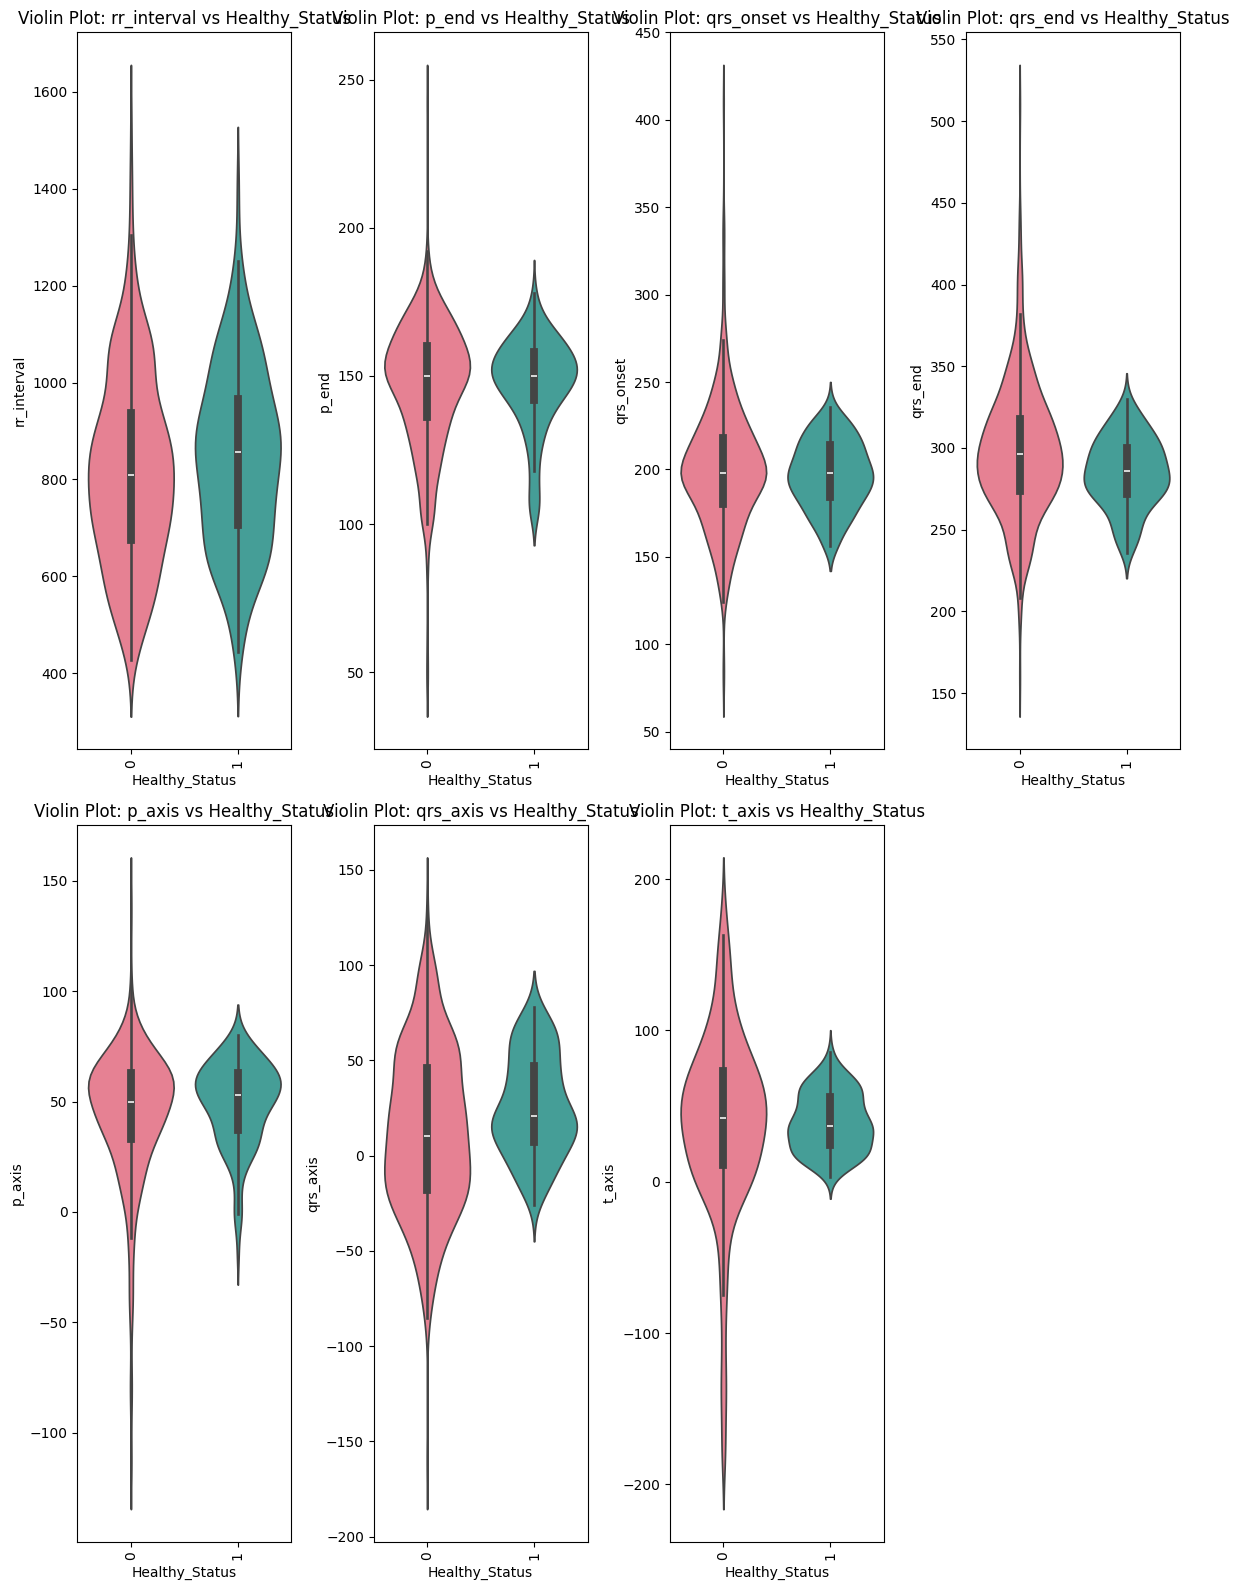

In [28]:
bi_variate_plots(
        train_data.loc[
            :, feat_type_detector.num_columns
        ],
        target,
    )

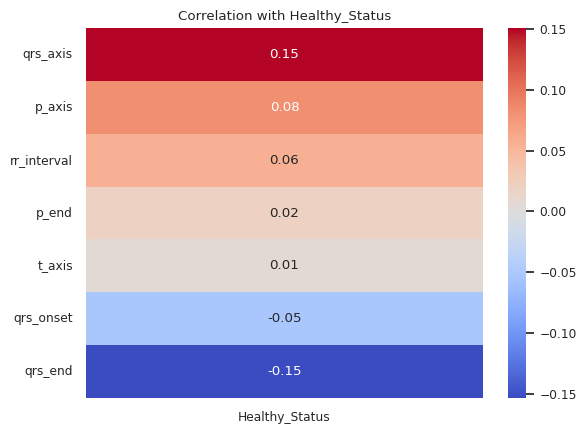

In [29]:
# show correlation to target
correlation_to_target(
    train_data.loc[:, feat_type_detector.num_columns],
      target,
      )

In [33]:
no_correlation = ["p_axis", "p_end", "t_axis"]

train = train_data.drop(no_correlation, axis=1)
test = test_dataset.drop(no_correlation, axis=1)

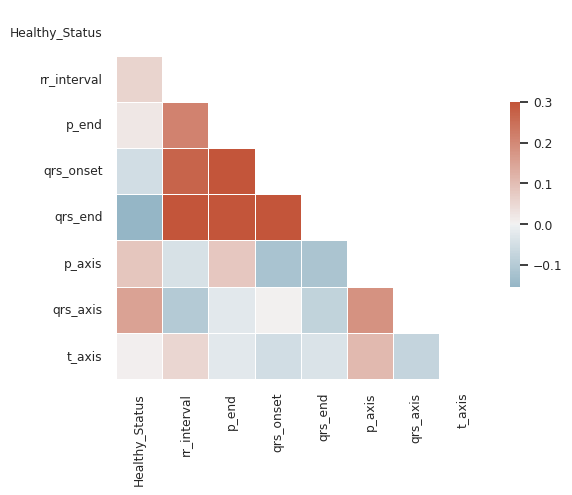

In [34]:
correlation_heatmap(train_data.loc[
            :, feat_type_detector.num_columns])

You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  1.38272242  1.38272242 -1.45223685 -0.12578802  1.60119634 -0.07377042
  0.36837919  0.66487952 -1.00488548 -0.01655105 -1.55107029 -0.48470947
 -0.23502498 -1.92559702 -0.07377042 -0.66156931  0.30075631 -1.1973506
  1.09142385 -1.37421045 -0.48470947  0.74290592 -0.932

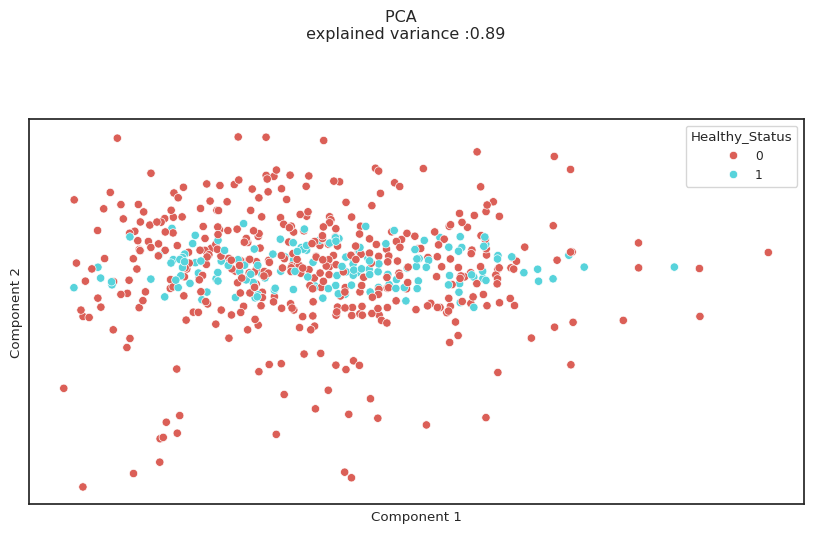

In [35]:
# show feature space after principal component analysis
plot_pca(train_data.loc[
            :, feat_type_detector.num_columns
        ].fillna(0), target)

You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  0.83865998 -0.85863784  0.83865998 -0.30996453 -0.58686508  0.92583237
  1.10017716  1.95138996  0.45920367 -0.85863784  1.28990532  1.38733329
  1.00787698 -0.89453235  0.19255869  1.60270038 -1.09451608 -0.15613089
 -0.78684881 -0.62788738  1.38733329 -0.93042687 -0.54

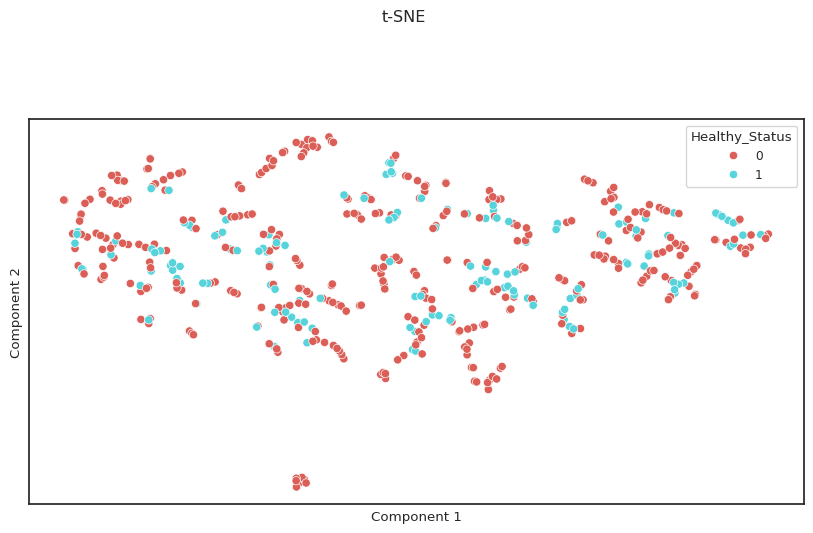

In [36]:
# show feature space after t-SNE
plot_tsne(train_data.loc[
            :, feat_type_detector.num_columns
        ].sample(500, random_state=42).fillna(0), target, perplexity=5, random_state=0)

In [37]:
from bluecast.eda.data_leakage_checks import (
    detect_categorical_leakage,
    detect_leakage_via_correlation,
)

In [38]:
# Detect leakage of numeric columns based on correlation
numresult = detect_leakage_via_correlation(
        train_data.loc[:, feat_type_detector.num_columns].fillna(0), target, threshold=0.9 # target column is part of detected numerical columns here
    )

No leakage has been detected


In [39]:
# Detect leakage of categorical columns based on Theil's U
result = detect_categorical_leakage(
        train_data.loc[:, feat_type_detector.cat_columns + [target]], target, threshold=0.9
    )

No leakage has been detected


In [41]:
automl = BlueCast(class_problem="binary")

automl.conf_training.hyperparameter_tuning_rounds = 2
automl.conf_training.calculate_shap_values = False
automl.conf_training.use_full_data_for_final_model = False

2024-11-21 12:41:48,645 - root - INFO - BlueCast blueprint initialized.


2024-11-21 12:43:14,705 - root - INFO - Start detecting and casting feature types.
2024-11-21 12:43:14,719 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-21 12:43:14,722 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-21 12:43:14,729 - root - INFO - Dropped the following columns as constants only: [].
2024-11-21 12:43:14,731 - root - INFO - Dropped the following columns as constants only: [].
2024-11-21 12:43:14,761 - root - WARNING - /usr/local/lib/python3.10/dist-packages/bluecast/blueprints/cast.py:294: UserWarning: Feature selection is disabled. Update the TrainingConfig param 'enable_feature_selection'
            to enable it or make use of a custom preprocessor to do it manually during the last mile computations step.
            Feature selection is recommended for datasets with many features (>1000). For datasets with a small amount
            of features feature selection is not recommended.
            
2024-11-

2024-11-21 12:43:15,109 - root - WARNING - Failed with params {'tree_method': 'gpu_hist'}. Error: [12:43:15] /workspace/src/tree/updater_gpu_hist.cu:861: Exception in gpu_hist: [12:43:15] /workspace/src/tree/updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7b29c5a2dcbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xd2c263) [0x7b29c652c263]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xd2cd24) [0x7b29c652cd24]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x57f526) [0x7b29c5d7f526]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5808f4) [0x7b29c5d808f4]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5cb1f8) [0x7b29c5dcb1f8]
  [bt] (6) /usr/local/lib/python3.10/dist-pack

  0%|          | 0/2 [00:00<?, ?it/s]

2024-11-21 12:43:28,918 - root - INFO - New best score: 0.5292388878917127 from random seed  33
2024-11-21 12:43:28,940 - root - INFO - Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 5, 'alpha': 0.00012864947846843427, 'lambda': 3.315884401682932, 'gamma': 0.6816496171469042, 'min_child_weight': 1.5312282297316187, 'subsample': 1.0, 'colsample_bytree': 0.11769528288703962, 'colsample_bylevel': 0.976626015751856, 'eta': 0.07458837217926657, 'steps': 383, 'tree_method': 'exact', 'grow_policy': 'lossguide'}
2024-11-21 12:43:28,960 - root - INFO - Start final model training


Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 5, 'alpha': 0.00012864947846843427, 'lambda': 3.315884401682932, 'gamma': 0.6816496171469042, 'min_child_weight': 1.5312282297316187, 'subsample': 1.0, 'colsample_bytree': 0.11769528288703962, 'colsample_bylevel': 0.976626015751856, 'eta': 0.07458837217926657, 'steps': 383, 'tree_method': 'exact', 'grow_policy': 'lossguide'}
Finished hyperparameter tuning


2024-11-21 12:43:29,751 - root - INFO - Finished training
2024-11-21 12:43:29,758 - root - INFO - Start casting feature types.
2024-11-21 12:43:29,764 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-21 12:43:29,768 - root - INFO - Dropped the following columns as constants only: [].
2024-11-21 12:43:29,770 - root - INFO - Start filling infinite values.
2024-11-21 12:43:29,772 - root - INFO - Start date column conversion.
2024-11-21 12:43:29,774 - root - INFO - Start checking if DataFrame schema of new data is consistent with previous data.
2024-11-21 12:43:29,777 - root - INFO - Start transforming categories with binary target encoder.
2024-11-21 12:43:29,778 - root - INFO - Start transforming categories with binary target encoder.
2024-11-21 12:43:29,785 - root - INFO - Predicting...
2024-11-21 12:43:29,790 - root - INFO - Start predicting on new data using Xgboost model.
2024-11-21 12:43:29,801 - root - INFO - Finished predicting
2024-11-21 12:43:29,809

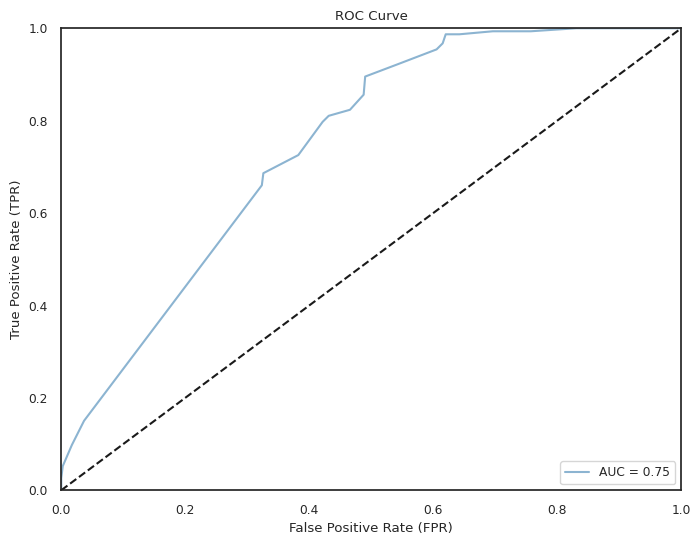

2024-11-21 12:43:30,192 - root - WARNING - /usr/local/lib/python3.10/dist-packages/bluecast/evaluation/eval_metrics.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
2024-11-21 12:43:30,216 - root - WARNING - /usr/local/lib/python3.10/dist-packages/bluecast/blueprints/cast.py:489: UserWarning: Failed to create lift chart. This indicates an issue with the classifier.
            Check if there is any varance in the predicted probabilities.


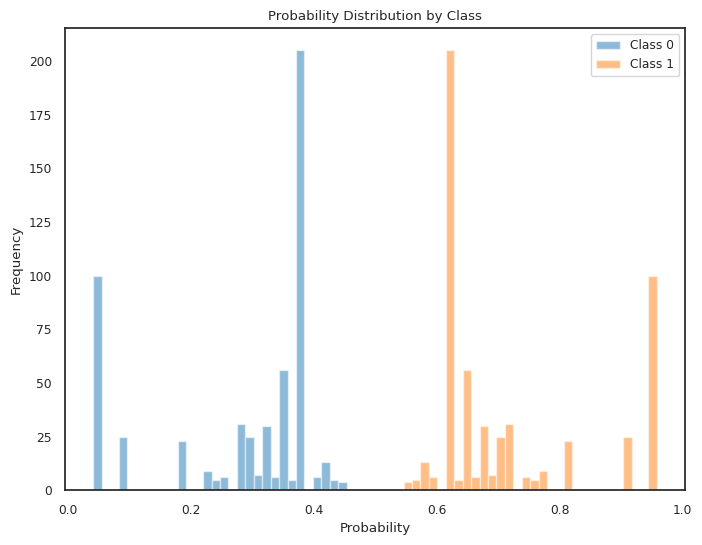

2024-11-21 12:43:30,646 - root - INFO - Start saving out of fold data.


{'matthews': 0.0,
 'accuracy': 0.7272727272727273,
 'recall': 0.7272727272727273,
 'f1_score_macro': 0.42105263157894735,
 'f1_score_micro': 0.7272727272727273,
 'f1_score_weighted': 0.6124401913875598,
 'log_loss': 0.5007426187879462,
 'balanced_logloss': 0.6689113974571228,
 'roc_auc': 0.7469162501601948,
 'classfication_report': '              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.84       408\n           1       0.00      0.00      0.00       153\n\n    accuracy                           0.73       561\n   macro avg       0.36      0.50      0.42       561\nweighted avg       0.53      0.73      0.61       561\n',
 'confusion_matrix': array([[408,   0],
        [153,   0]])}

In [43]:
automl.fit_eval(
    df=train,
    df_eval=train.drop('Healthy_Status', axis=1),
    target_eval=train['Healthy_Status'],
    target_col="Healthy_Status",
)

# AutoML PyCaret

https://habr.com/ru/companies/ods/articles/657525/

In [ ]:
!pip install fedot --quiet

In [ ]:
from fedot.api.main import Fedot
from sklearn.metrics import classification_report, roc_auc_score

from data.data import get_train_data, get_test_data

train_features, train_target = get_train_data()
test_features, test_target = get_test_data()

# Task selection, initialisation of the framework
fedot_model = Fedot(problem='classification', timeout=timeout)

# Fit model
obtained_pipeline = fedot_model.fit(features=train_features, target=train_target)
obtained_pipeline.show()

# Make predictions
predict = fedot_model.predict(test_features)
predict_probs = fedot_model.predict_proba(test_features)

In [ ]:
!pip install pycaret --quiet

In [ ]:
from pycaret.datasets import get_data

#  Набор данных о неплательщиках по кредиту
df = table_data

# Проверка формы набора данных
print('исходный набор данных: ',df.shape)

# Инициализация начального числа для генераторов случайных чисел
seed = 10

# Создание обучающего набора с помощью выборки pandas — видимый набор данных
knowledge = df.sample(frac=.8, random_state=seed)
#knowledge.reset_index(inplace=True, drop=True)
print('выделяем из исходного набора данныз базу для обучения: ', knowledge.shape)

# Использование образцов, недоступных в обучающем наборе, в качестве будущего или невидимого набора данных
payload = df.drop(knowledge.index)
#payload.reset_index(inplace=True, drop=True)
print('набор данных для проверки: ',payload.shape)


исходный набор данных:  (704, 8)
выделяем из исходного набора данныз базу для обучения:  (563, 8)
набор данных для проверки:  (141, 8)


In [ ]:
# Задействуем волшебную функцию!
from pycaret.classification import *

# Функция setup инициализирует среду и создает конвейер преобразования
clf = setup(data=knowledge, target="Healthy_Status", session_id=123)

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

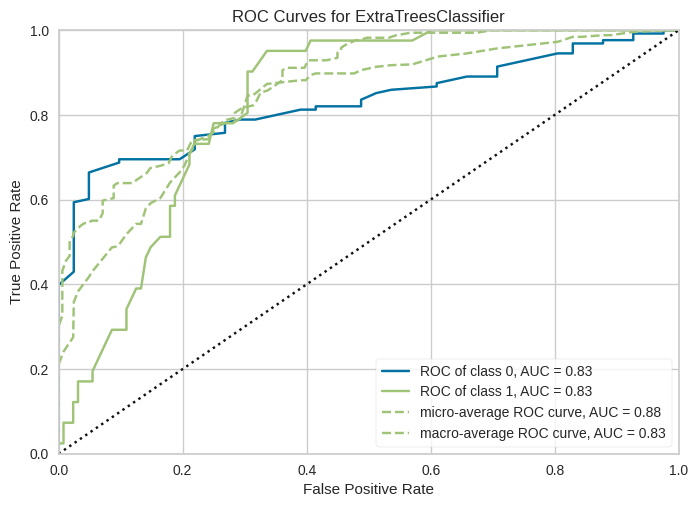

In [ ]:
# Сравниваем различные модели в зависимости от их метрик производительности. По умолчанию модели сортируются по точности
best_model = compare_models(fold=5)

# Построение кривой AUC
plot_model(best_model, plot="auc")

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


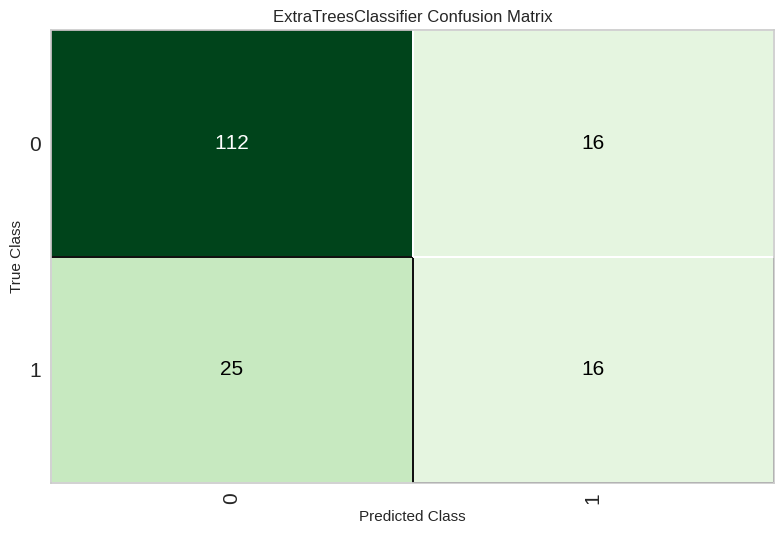

In [ ]:
# Функция Tune model выполняет сеточный поиск для определения оптимальных параметров
tuned = tune_model(best_model)
plot_model(tuned, plot="confusion_matrix")

# Прогнозирование на тестовом наборе
predict_model(tuned)

# Доработка модели путем переобучения на всем видимом наборе данных
final_model = finalize_model(tuned)

In [ ]:
# Прогнозирование на тестовом наборе
predict_model(tuned)

# Доработка модели путем переобучения на всем видимом наборе данных
final_model = finalize_model(tuned)

# Прогнозирование на невидимых данных
predictions = predict_model(final_model, data=payload)
predictions.head()

rr_interval  p_end  qrs_onset  qrs_end  p_axis  qrs_axis  t_axis  \
6           952    146        198      282      24        80      20   
10         1052    138        172      268      55       -16       2   
16          530    128        204      290      99        37     142   
18          666    168        246      328      69        26      95   
44          882    174        218      298      13       -29     -80   

    Healthy_Status  prediction_label  prediction_score  
6                1                 0              0.60  
10               0                 0              0.79  
16               0                 0              0.96  
18               0                 0              0.99  
44               0                 0              0.99

# ML-классификация: модель GaussianNaiveBayes

In [ ]:
#So, when you do [:, -1] it means you are taking all the rows and only the last column. -1 represents the last column.
#When you do [:, :-1], it means you are taking all the rows and all the columns except the last column.
#X1, y1 = table_data.iloc[:, :-1], table_data.iloc[:, -1]

In [ ]:
# set the classification index of table
clf_index = 0

# classification variable
y1 = table_data.iloc[:, clf_index]
# input variable
X1 = table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:]

y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values,
                                                        y1.values,
                                                        test_size=0.3,
                                                        random_state=0,
                                                        stratify=y1.values)

In [ ]:
nb_clf = GaussianNaiveBayes()
nb_clf.fit(X1_train, y1_train)
nb_clf_pred_res = nb_clf.predict(X1_test)
nb_clf_accuracy = accuracy_score(y1_test, nb_clf_pred_res)

print(f'Naive Bayes classifier accucacy: {nb_clf_accuracy}')
print(nb_clf_pred_res)

Naive Bayes classifier accucacy: 0.29347198151357595
[1 1 1 ... 1 1 1]


<ipython-input-65-e61f33113988>:13: RuntimeWarning: divide by zero encountered in divide
  return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
<ipython-input-65-e61f33113988>:13: RuntimeWarning: invalid value encountered in divide
  return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)


sk Naive Bayes classifier accucacy: 0.4119006354708261
[1 0 0 ... 1 1 1]


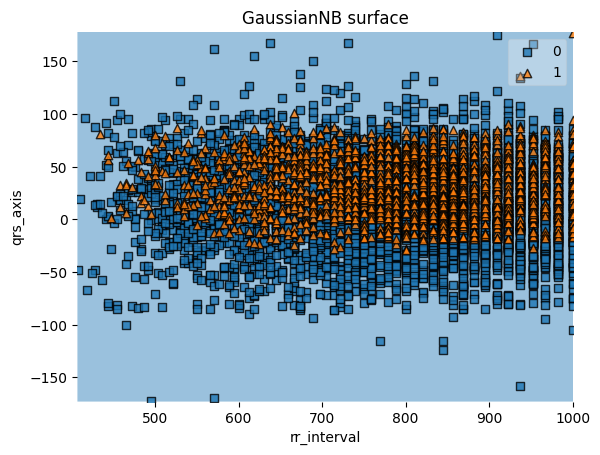

In [ ]:
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X1_train, y1_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X1_test)
sk_nb_clf_accuracy = accuracy_score(y1_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accucacy: {sk_nb_clf_accuracy}')
print(sk_nb_clf_pred_res)

feature_indexes = [0, 6]
title1 = 'GaussianNB surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_nb_clf, feature_indexes, title1)

# ML - Описание классов и матрица ошибок

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
table_data.columns

Index(['Healthy_Status', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset',
       'qrs_end', 'p_axis', 'qrs_axis'],
      dtype='object')

In [ ]:
# set the classification index of table
clf_index = 0

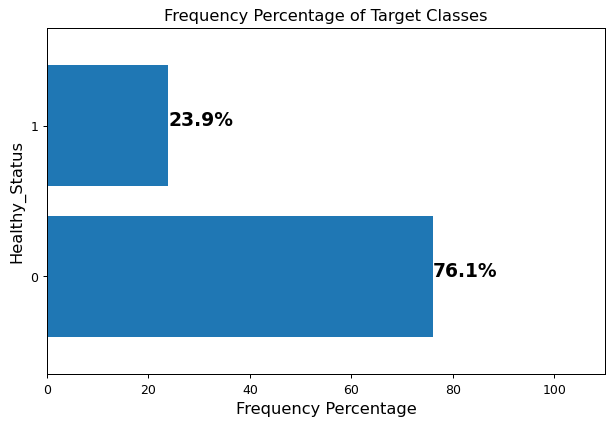

In [ ]:
plt.figure(figsize=(35,20),dpi=90)
# Plot frequency percentages barplot
table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=13)
plt.ylabel(table_data.columns[clf_index], fontsize=13)
plt.title('Frequency Percentage of Target Classes', fontsize=13)
plt.show()

In [ ]:
# set the classification index of table
clf_index = 0

# classification variable
y1 = table_data.iloc[:, clf_index]
# input variable
X1 = table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:]

y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values,
                                                        y1.values,
                                                        test_size=0.3,
                                                        random_state=0,
                                                        stratify=y1.values)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1.values,
                                                 y1.values,
                                                 test_size=0.3,
                                                 random_state=41,
                                                 stratify=y1.values)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (492, 7)
y_train shape: (492,)
X_test shape: (212, 7)
y_test shape: (212,)


In [ ]:
GussianClassifier = GaussianNB()
GussianClassifier.fit(X1_train,y1_train)
y_pred=GussianClassifier.predict(X_test)
print("===================================> Result <===================================")
print("Accuracy                     = " ,metrics.accuracy_score(y_test,y_pred))
print("F1 Score                     = " ,metrics.f1_score(y_test,y_pred))

===================================> Result <===================================
Accuracy                     =  0.7783018867924528
F1 Score                     =  0.5840707964601771


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

              precision    recall  f1-score   support

        True       0.88      0.82      0.85       161
       False       0.53      0.65      0.58        51

    accuracy                           0.78       212
   macro avg       0.71      0.73      0.72       212
weighted avg       0.80      0.78      0.79       212



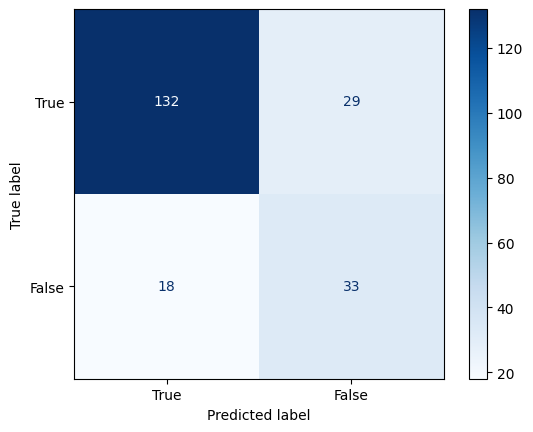

In [ ]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y_test, y_pred,labels=labels_names, target_names=target_names))
#cm = confusion_matrix(y_test, y_pred,labels=labels_names,normalize='true')
cm = confusion_matrix(y_test, y_pred,labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

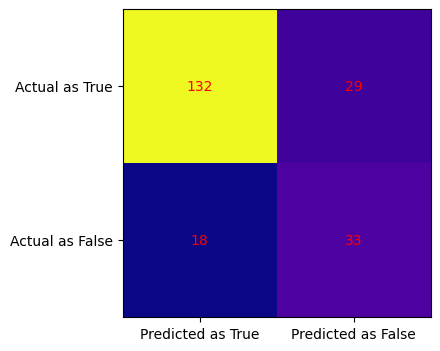

In [ ]:
cm = confusion_matrix(y_test,GussianClassifier.predict(X_test))

fig , ax  = plt.subplots(figsize=(4,4))
ax.imshow(cm, cmap = 'plasma')
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted as True","Predicted as False"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual as True","Actual as False"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha="center",va="center",color = "red")

# Методы PCA - princopal component analysis

https://web.archive.org/web/20090528101113/http://www.chemometrics.ru/materials/textbooks/pca.htm

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
table_data_pca = table_data
table_data_pca = table_data_pca.drop('Healthy_Status', axis = 1)
table_data_pca.columns

Index(['rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis',
       't_axis'],
      dtype='object')

In [ ]:
#cancer = load_breast_cancer()
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 2).fit(scaled_data)
# PCA(copy=True, n_components=2, whiten=False)
x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(704, 8) (704, 2)


In [ ]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))
#To see how much variance is preserved for each dataset.

[0.33648237 0.1637193 ]
0.500201670035699


In [ ]:
def pca_explained(X, threshold):
  features = X.shape[1]
  for i in range(2, features):
    pca = PCA(n_components = i).fit(X)
    sum_ = pca.explained_variance_ratio_
    # add all components explained variances
    percent = sum(sum_)
    print('{} components at {:.2f}% explained variance'.format(i,percent*100))
    if percent > threshold:
      break

pca_explained(scaled_data, 0.85)

2 components at 50.02% explained variance
3 components at 65.41% explained variance
4 components at 77.97% explained variance
5 components at 88.52% explained variance


Text(0, 0.5, 'Second Principal Component')

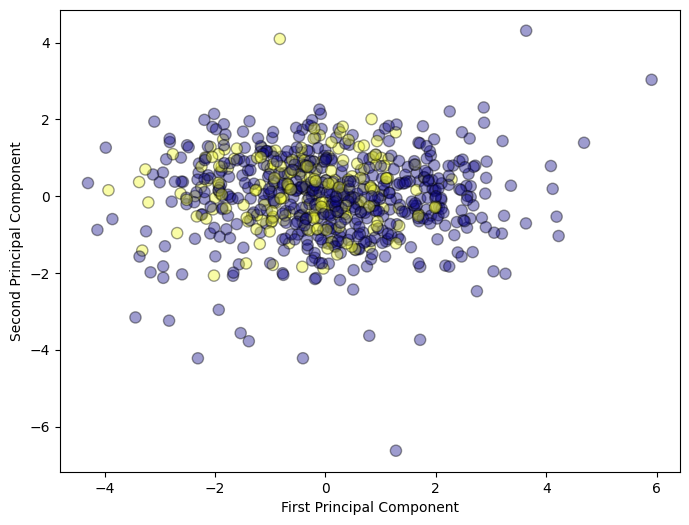

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=table_data['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<ipython-input-157-99fc634eb334>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
<ipython-input-157-99fc634eb334>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')


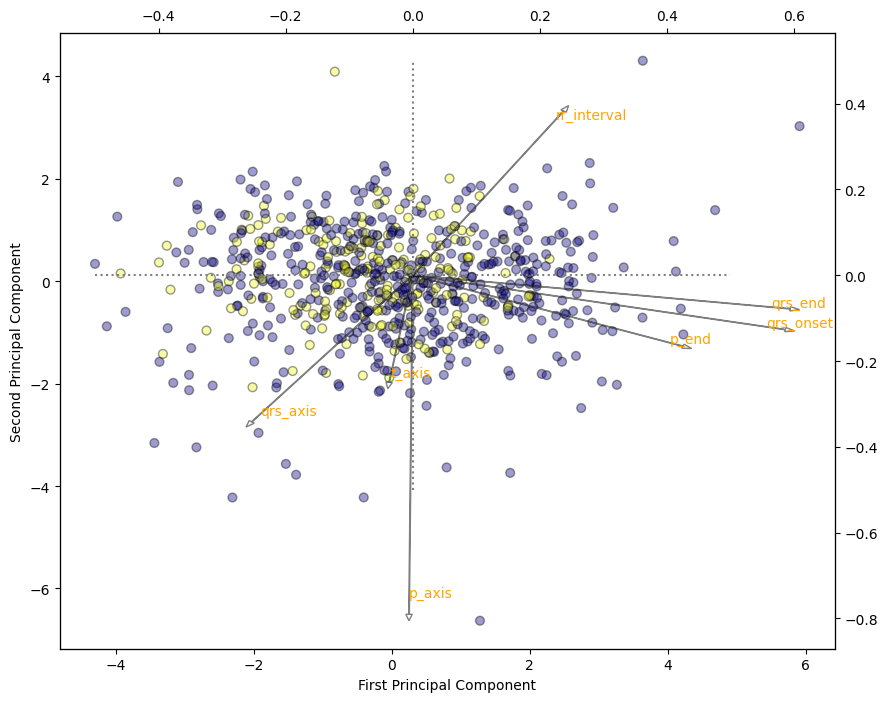

In [ ]:
# put feature values into dataframe
components = pd.DataFrame(pca.components_.T, index=table_data_pca.columns, columns= ['PCA1','PCA2'])
# plot size
plt.figure(figsize=(10,8))
# main scatterplot
plt.scatter(x_pca[:,0], x_pca[:,1], c=table_data['Healthy_Status'],
            cmap='plasma', alpha=0.4, edgecolors='black', s=40);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.ylim(15,-15);
#plt.xlim(20,-20);

# individual feature values
ax2 = plt.twinx().twiny();
#ax2.set_ylim(-0.5,0.5);
#ax2.set_xlim(-0.5,0.5);

# reference lines
ax2.hlines(0,-0.5,0.5, linestyles='dotted', colors='grey')
ax2.vlines(0,-0.5,0.5, linestyles='dotted', colors='grey')

# offset for labels
offset = 0.95
# arrow & text
for a, i in enumerate(components.index):
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')

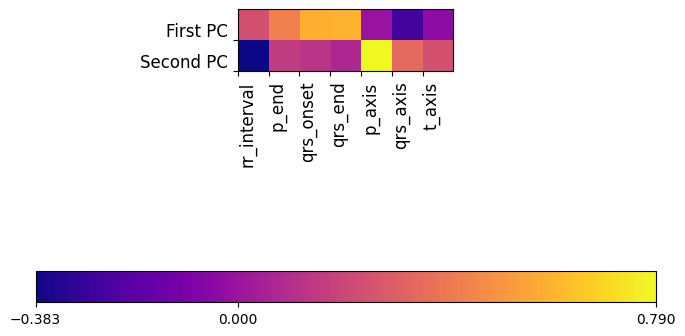

In [ ]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(table_data_pca.columns)
plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left',fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom',fontsize=12);
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()],pad=0.65);

# Метод класстеризации t-SNE

https://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs

https://distill.pub/2016/misread-tsne/


In [ ]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold._t_sne import (_joint_probabilities, _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

  if event.key is 'enter':



In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

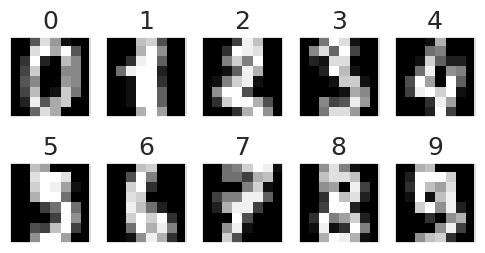

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [ ]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
Y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [ ]:
def scatter_me(x, colors):
  # We choose a color palette with seaborn.
  palette = np.array(sns.color_palette("hls", 10))

  # We create a scatter plot.
  f = plt.figure(figsize=(8, 8))
  ax = plt.subplot(aspect='equal')
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int32)])
  plt.xlim(-25, 25)
  plt.ylim(-25, 25)
  ax.axis('off')
  ax.axis('tight')

  # We add the labels for each digit.
  txts = []
  for i in range(10):
    # Position of each label.
    xtext, ytext = np.median(x[colors == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
    txts.append(txt)
  return f, ax, sc, txts

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.8082473278045654, -54.057701110839844, '0'),
  Text(5.064175605773926, 12.577442169189453, '1'),
  Text(-29.153911590576172, 31.029521942138672, '2'),
  Text(-37.65543746948242, -2.3517205715179443, '3'),
  Text(42.655757904052734, 12.986211776733398, '4'),
  Text(1.9045530557632446, -19.32084846496582, '5'),
  Text(34.7244987487793, -21.18690299987793, '6'),
  Text(8.102083206176758, 43.51930618286133, '7'),
  Text(-11.758626937866211, 5.696908473968506, '8'),
  Text(-22.60057830810547, -17.93454933166504, '9')])

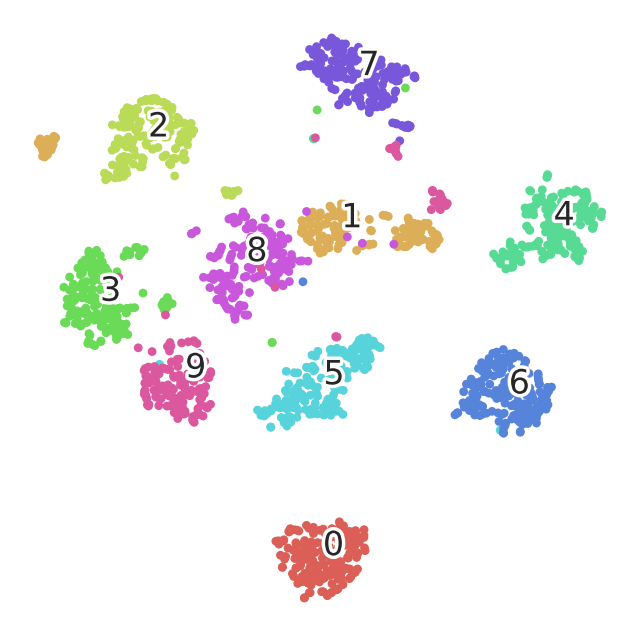

In [ ]:
scatter_me(digits_proj, Y)

In [ ]:
def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P

In [ ]:
# Pairwise distances between all data points.
D = pairwise_distances(X, squared=True)
# Similarity with constant sigma.
P_constant = _joint_probabilities_constant_sigma(D, .002)
# Similarity with variable sigma.
P_binary = _joint_probabilities(D, 30., False)
# The output of this function needs to be reshaped to a square matrix.
P_binary_s = squareform(P_binary)

Text(0.5, 1.0, '$p_{j|i}$ (variable $\\sigma$)')

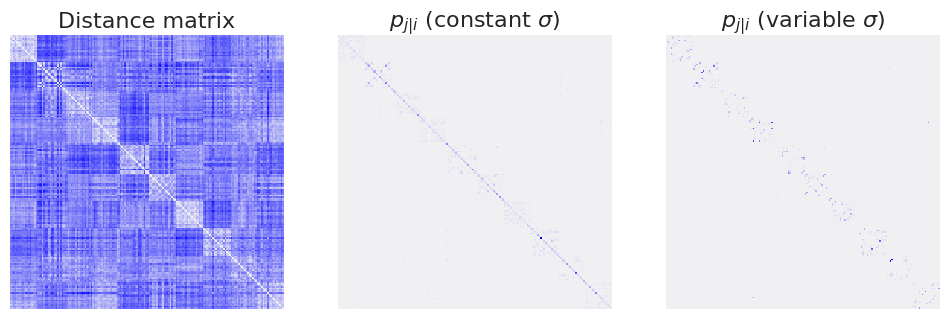

In [ ]:
plt.figure(figsize=(12, 4))
pal = sns.light_palette("blue", as_cmap=True)

plt.subplot(131)
plt.imshow(D[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("Distance matrix", fontdict={'fontsize': 16})

plt.subplot(132)
plt.imshow(P_constant[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (constant $\sigma$)", fontdict={'fontsize': 16})

plt.subplot(133)
plt.imshow(P_binary_s[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (variable $\sigma$)", fontdict={'fontsize': 16})
#plt.savefig('images/similarity-generated.png', dpi=120)

In [ ]:
# This list will contain the positions of the map points at every iteration.
positions = []
def _gradient_descent(objective, p0, it, n_iter, n_iter_without_progress=30,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
                      args=[]):
    # The documentation of this function can be found in scikit-learn's code.
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0

    for i in range(it, n_iter):
        # We save the current position.
        positions.append(p.copy())

        new_error, grad = objective(p, *args)
        error_diff = np.abs(new_error - error)
        error = new_error
        grad_norm = linalg.norm(grad)

        if error >= n_iter_without_progress:
          break
        if min_grad_norm >= grad_norm:
          break
        if min_error_diff >= error_diff:
          break

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

    return p, error, i
sklearn.manifold._t_sne._gradient_descent = _gradient_descent

In [ ]:
X_proj = TSNE(random_state=RS).fit_transform(X)

TypeError: _gradient_descent() got an unexpected keyword argument 'n_iter_check'

In [ ]:
X_iter = np.dstack(position.reshape(-1, 2)
                   for position in positions)

TypeError: arrays to stack must be passed as a "sequence" type such as list or tuple.

In [ ]:
f, ax, sc, txts = scatter_me(X_iter[..., -1], y)

def make_frame_mpl(t):
    i = int(t*40)
    x = X_iter[..., i]
    sc.set_offsets(x)
    for j, txt in zip(range(10), txts):
        xtext, ytext = np.median(x[y == j, :], axis=0)
        txt.set_x(xtext)
        txt.set_y(ytext)
    return mplfig_to_npimage(f)

animation = mpy.VideoClip(make_frame_mpl,
                          duration=X_iter.shape[2]/40.)
animation.write_gif("https://d3ansictanv2wj.cloudfront.net/images/animation-94a2c1ff.gif", fps=20)

NameError: name 'X_iter' is not defined

# MDS t-SNE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

Text(0, 0.5, 'Second Principal Component')

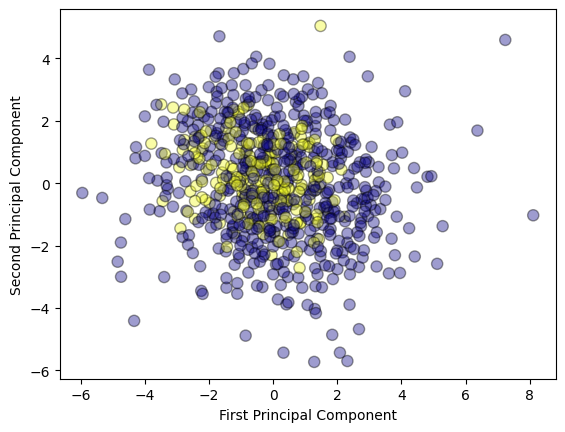

In [ ]:
mds = MDS(n_components = 2)
scaled_data_mds = mds.fit_transform(scaled_data)

plt.scatter(scaled_data_mds[:,0], scaled_data_mds[:,1], c=table_data['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

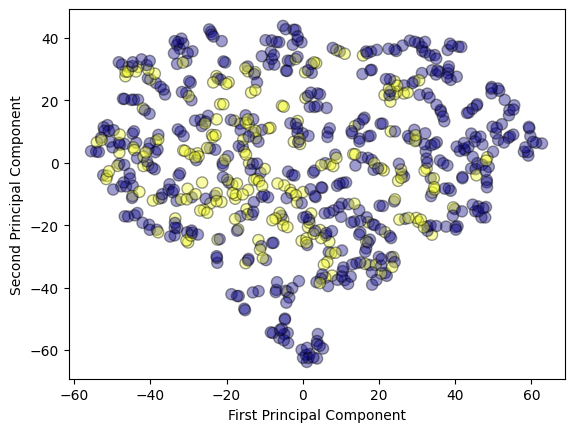

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0, perplexity=10)
scaled_data_mds_tsne = tsne.fit_transform(scaled_data)
plt.scatter(scaled_data_mds_tsne[:,0], scaled_data_mds_tsne[:,1], c=table_data['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram, fcluster

In [ ]:
#scaled_data, data_table['Healthy_status'] = make_blobs(random_state = 10)
#n_clusters must be None if distance_threshold is not None
cls = AgglomerativeClustering(n_clusters = 3, affinity='euclidean',linkage='ward', distance_threshold=None)
cls_assignment = cls.fit_predict(scaled_data)

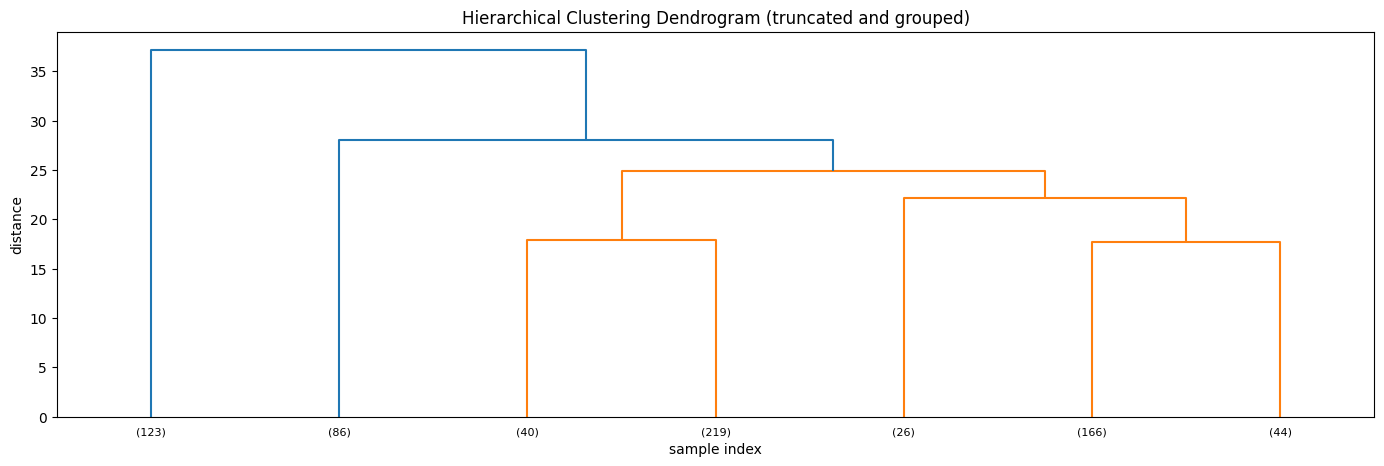

In [ ]:
Z = ward(scaled_data)
plt.figure(figsize=(17,5));
R = dendrogram(Z, truncate_mode='lastp', p=7, orientation='top', leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (truncated and grouped)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

https://stackoverflow.com/questions/54810800/how-to-get-a-list-of-all-leaves-under-a-node-in-a-dendrogram

In [ ]:
# put X in a dataframe
df = pd.DataFrame()
df['col1']=X[:,0]
df['col2']=X[:,1]

index=[]
for i in range(len(X)):
    elem = 'A' + str(i)
    index.append(elem)

df['index'] = index
print(df.shape)
df.head()

# retrieve elements in each cluster
label = fcluster(Z, 5, criterion='maxclust')

df_clst = pd.DataFrame()
df_clst['index']  = df['index']
df_clst['label']  = label

# print them
for i in range(5):
   elements = df_clst[df_clst['label']==i+1]['index'].tolist()
   size = len(elements)
   print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))

NameError: name 'fcluster' is not defined

In [ ]:
from scipy.cluster.hierarchy import fcluster
fl = fcluster(Z,5,criterion='maxclust')

In [ ]:
R

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5]],
 'dcoord': [[0.0, 20.250716396171867, 20.250716396171867, 0.0],
  [0.0, 22.006139199097237, 22.006139199097237, 20.250716396171867],
  [0.0, 24.635641196702398, 24.635641196702398, 22.006139199097237],
  [0.0, 19.146048741900454, 19.146048741900454, 0.0],
  [0.0, 27.017808675252834, 27.017808675252834, 19.146048741900454],
  [24.635641196702398,
   42.71244083393276,
   42.71244083393276,
   27.017808675252834]],
 'ivl': ['(12)', '(113)', '(141)', '(87)', '(32)', '(125)', '(194)'],
 'leaves': [1379, 1391, 1398, 1400, 1389, 1396, 1399],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2']}

In [ ]:
R

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5]],
 'dcoord': [[0.0, 20.250716396171867, 20.250716396171867, 0.0],
  [0.0, 22.006139199097237, 22.006139199097237, 20.250716396171867],
  [0.0, 24.635641196702398, 24.635641196702398, 22.006139199097237],
  [0.0, 19.146048741900454, 19.146048741900454, 0.0],
  [0.0, 27.017808675252834, 27.017808675252834, 19.146048741900454],
  [24.635641196702398,
   42.71244083393276,
   42.71244083393276,
   27.017808675252834]],
 'ivl': ['(12)', '(113)', '(141)', '(87)', '(32)', '(125)', '(194)'],
 'leaves': [1379, 1391, 1398, 1400, 1389, 1396, 1399],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2']}

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
linkage_matrix = sch.average(scaled_data)
rootnode, nodelist = sch.to_tree(linkage_matrix, rd=True)
leaves = sch.leaves_list(linkage_matrix)
print(linkage_matrix[3,:])
#sch.dendrogram(linkage_matrix);

[6.48000000e+02 6.49000000e+02 1.62090411e-01 2.00000000e+00]


In [ ]:
R

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5]],
 'dcoord': [[0.0, 20.250716396171867, 20.250716396171867, 0.0],
  [0.0, 22.006139199097237, 22.006139199097237, 20.250716396171867],
  [0.0, 24.635641196702398, 24.635641196702398, 22.006139199097237],
  [0.0, 19.146048741900454, 19.146048741900454, 0.0],
  [0.0, 27.017808675252834, 27.017808675252834, 19.146048741900454],
  [24.635641196702398,
   42.71244083393276,
   42.71244083393276,
   27.017808675252834]],
 'ivl': ['(12)', '(113)', '(141)', '(87)', '(32)', '(125)', '(194)'],
 'leaves': [1379, 1391, 1398, 1400, 1389, 1396, 1399],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2']}

# Affinity propagation

In [ ]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_rand_score

In [ ]:
def plot_connected_points(X, labels, centers, cmap):
    for i in range(len(X)):
        color = cmap(labels[i] / len(centers))
        plt.plot([X[i, 0], centers[labels[i], 0]], [X[i, 1], centers[labels[i], 1]], c=color, alpha=0.8)

In [ ]:
sk_ap = AffinityPropagation()
sk_ap_pred_res = sk_ap.fit_predict(scaled_data)
sk_ap_ari = adjusted_rand_score(table_data['Healthy_Status'], sk_ap_pred_res)
print(f'Adjusted Rand Score for sk AffinityPropagation: {sk_ap_ari}', '', sep='\n')
print('Number of clusters = ', np.max(sk_ap_pred_res))
#print('prediction', sk_ap_pred_res, sep='\n')

Adjusted Rand Score for sk AffinityPropagation: 0.0032783107337274802

Number of clusters =  50


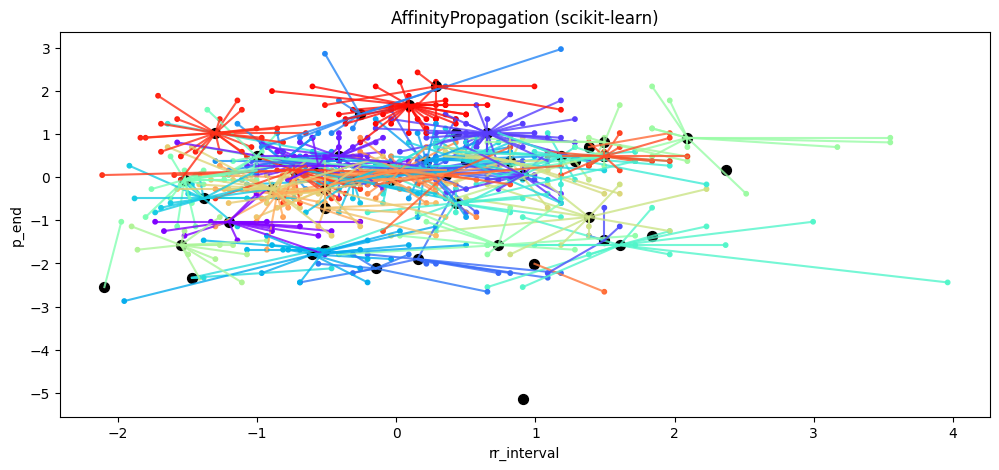

In [ ]:
plt.figure(figsize=(12, 5))

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=sk_ap_pred_res, cmap='rainbow', s=10)
plt.scatter(sk_ap.cluster_centers_[:, 0], sk_ap.cluster_centers_[:, 1], c='black', s=50)
plt.title('AffinityPropagation (scikit-learn)')
plt.xlabel(table_data.columns[1])
plt.ylabel(table_data.columns[2])

plot_connected_points(scaled_data, sk_ap_pred_res, sk_ap.cluster_centers_, plt.cm.rainbow)

plt.show()

# Agglomerative Clustering

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    #plt.figure(figsize=(17,5));
    dendrogram(linkage_matrix, **kwargs)
    plt.rcParams["figure.figsize"] = (17,5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()



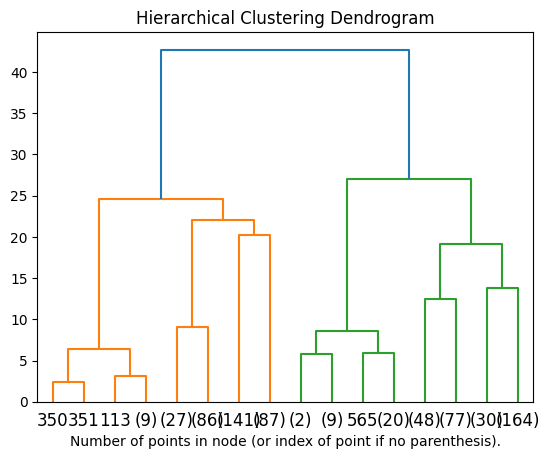

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(scaled_data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
#

# Сравнение ML алгоритмов

In [ ]:
table_data.columns

Index(['Healthy_Status', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset',
       'qrs_end', 'p_axis', 'qrs_axis'],
      dtype='object')

In [ ]:
clf_index = 0
feature_indexes = [4, 7]

table_data_clf = (table_data.values[:,feature_indexes],
                  table_data[table_data.columns[clf_index]])

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

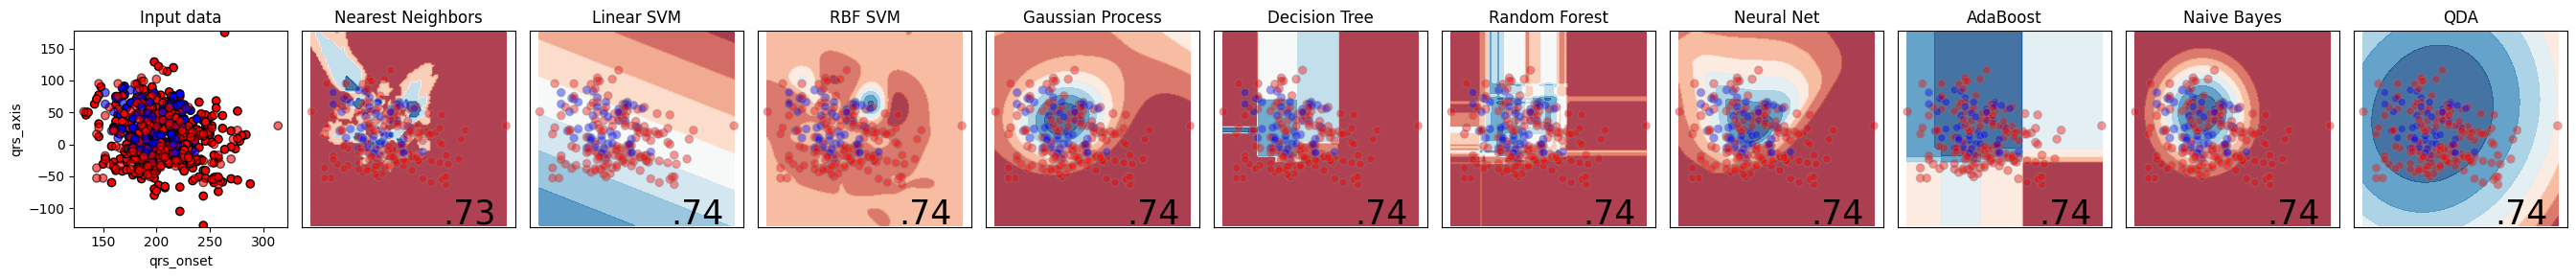

In [ ]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


datasets = [
    #make_moons(noise=0.3, random_state=0),
    #make_circles(noise=0.2, factor=0.5, random_state=1),
    #linearly_separable,
    table_data_clf
]

figure = plt.figure(figsize=(27, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    #x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    #y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    x_range = abs(X[:, 0].max()) - abs(X[:, 0].min())
    y_range = abs(X[:, 1].max()) - abs(X[:, 1].min())

    x_min, x_max = X[:, 0].min() - 0.05*x_range, X[:, 0].max() + 0.05*x_range
    y_min, y_max = X[:, 1].min() - 0.05*y_range, X[:, 1].max() + 0.05*y_range


    # just plot the dataset first
    cm = plt.cm.RdBu
    # red and blue = 0000FF color. Red = 0. Blue = 1 status
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_xlabel(table_data.columns[feature_indexes[0]])
    ax.set_ylabel(table_data.columns[feature_indexes[1]])
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        #ax.scatter(
        #    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        #)
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="grey",
            alpha=0.4,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - x_range*0.1,
            y_min + y_range*0.1,
            ("%.2f" % score).lstrip("0"),
            size=25,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
datasets

[(array([[ 0, 81],
         [ 0, 77],
         [ 1, 79],
         ...,
         [ 1, 70],
         [ 1, 43],
         [ 0, 30]]),
  0       0
  1       0
  2       1
  3       1
  6       1
         ..
  9994    1
  9995    1
  9996    1
  9998    1
  9999    0
  Name: Healthy_Status, Length: 7046, dtype: int64)]

# Примеры классификаторов на модельных задачах

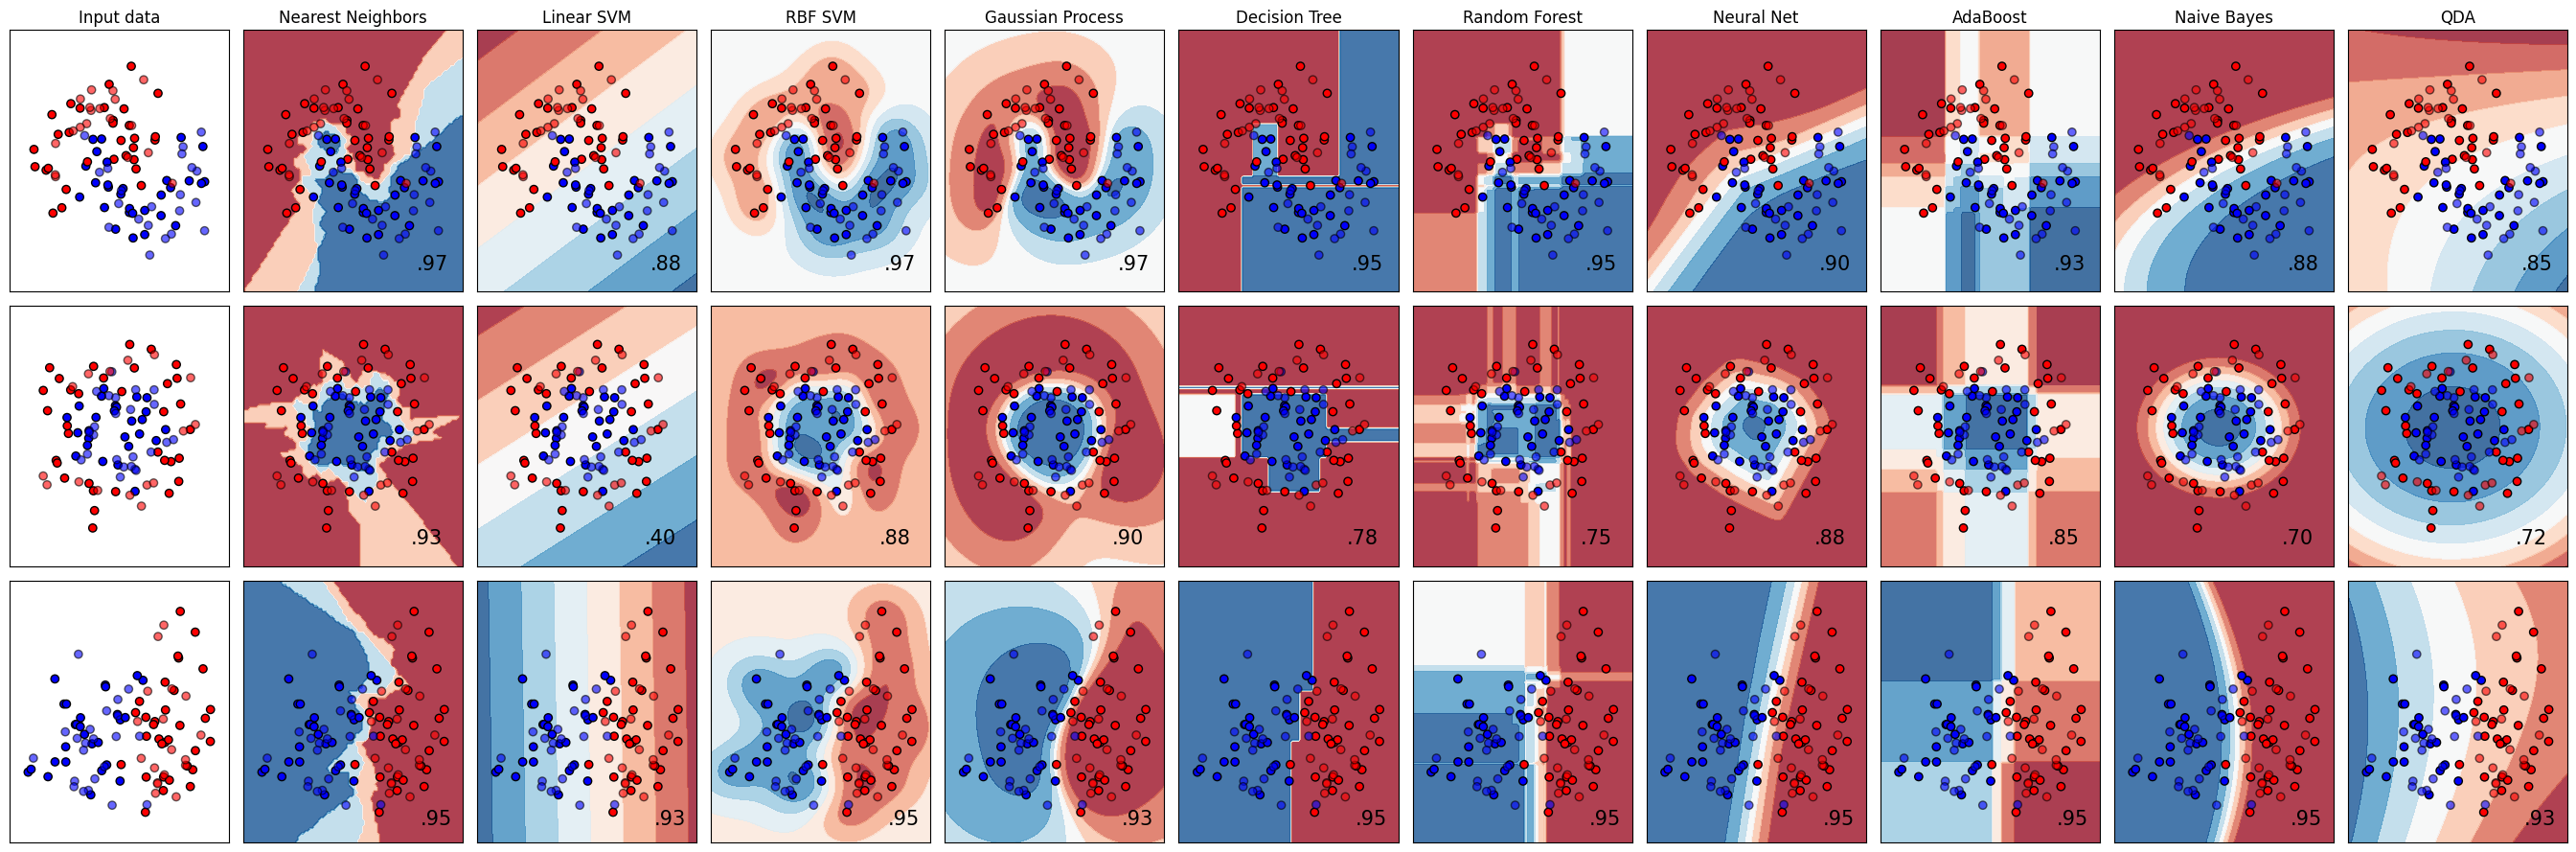

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    # red and blue = 0000FF color. Red = 0, Blue = 1 status
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()